# Survey Data Analysis (Dirty Triad)
## Step 1: Data Overview


In [1]:
import pandas as pd
import numpy as np
data = pd.read_csv("data_psych_narc1.csv", sep ="\t")
data['ID'] = range(len(data))
data_untouched = data.copy()
print(data.shape)
print(data.head())
print(data.columns)
data.describe()

(53981, 27)
   HSNS1  HSNS2  HSNS3  HSNS4  HSNS5  HSNS6  HSNS7  HSNS8  HSNS9  HSNS10  ...  \
0      2      4      5      1      4      5      4      3      3       2  ...   
1      4      2      2      4      3      4      4      5      4       3  ...   
2      5      5      5      4      2      5      5      4      4       2  ...   
3      4      1      2      2      4      5      2      2      5       2  ...   
4      5      3      4      5      5      5      4      5      4       3  ...   

   DDN4  DDM1  DDM2  DDM3  DDM4  age  gender  accuracy  country  ID  
0     1     1     2     2     1   37       2        98       PT   0  
1     3     4     4     4     3   34       3        95       PL   1  
2     3     3     4     4     2   22       2        80       AU   2  
3     1     4     2     3     4   24       1        99       US   3  
4     2     4     4     1     5   21       2        90       US   4  

[5 rows x 27 columns]
Index(['HSNS1', 'HSNS2', 'HSNS3', 'HSNS4', 'HSNS5', 'HSNS6

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,...,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age,gender,accuracy,ID
count,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,...,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,53981.000000,5.398100e+04,53981.000000
mean,3.761601,3.084011,3.441285,2.863081,3.242771,3.995702,3.477298,3.256627,3.736704,2.600674,...,3.172116,2.728719,3.096126,3.716363,3.314018,2.657231,42.455160,1.374076,8.110281e+04,26990.000000
std,1.168525,1.374394,1.278453,1.284221,1.269016,1.044109,1.198457,1.295645,1.177163,1.326687,...,1.334482,1.255528,1.333651,1.181134,1.283507,1.248243,2670.496175,0.524065,1.307562e+07,15583.116777
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000e+00,0.000000
25%,3.000000,2.000000,2.000000,2.000000,2.000000,4.000000,3.000000,2.000000,3.000000,2.000000,...,2.000000,2.000000,2.000000,3.000000,2.000000,2.000000,18.000000,1.000000,8.000000e+01,13495.000000
50%,4.000000,3.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,2.000000,...,3.000000,3.000000,3.000000,4.000000,4.000000,2.000000,22.000000,1.000000,8.900000e+01,26990.000000
75%,5.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,5.000000,4.000000,...,4.000000,4.000000,4.000000,5.000000,4.000000,4.000000,30.000000,2.000000,9.500000e+01,40485.000000
max,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,567658.000000,3.000000,2.147484e+09,53980.000000


### Dataset Features
* The dataset contains 53,981 total entries (rows).
* An `ID` column is created explicitly as a row identifier, ranging from 0 to 53,980.
* Each row contains multiple response variables, along with three demographic variables: age, gender, and country.
* No primary key is provided in the raw dataset.
* The `accuracy` column is treated as a proxy for response reliability and is used as a weighting factor rather than a hard filter.
* The age variable contains implausible values; rows with unrealistic age entries are excluded from further analysis.
* Gender is encoded with four possible values: 1 = male, 2 = female, 3 = other, and 0 = missing.
* Countries are represented using coded identifiers.
* Some entries in the `accuracy` column fall outside the expected range of 0–100. These values are corrected by replacing them with the mean accuracy value to avoid arbitrary exclusion or inflation of their influence, under the assumption that such values arise from encoding or entry errors.

## Step 2: Removing invalid age entries
Rows with age values less than or equal to 10, or greater than or equal to 110, are removed, as these values are implausible for the target population and likely reflect data-entry errors.  
The corresponding `ID` values of removed rows are recorded for later diagnostic analysis.


In [2]:
ini = len(data)
invalid_mask = (data["age"] <= 10) | (data["age"] >= 110)
dropped_age_ids = data[invalid_mask]["ID"].tolist()

data = data.loc[~invalid_mask]

print(f"Found {len(dropped_age_ids)} rows with invalid age entries.")
data.shape

Found 990 rows with invalid age entries.


(52991, 27)

### Step 3: Checking and correcting invalid entries in the accuracy column
Accuracy values below 0 are treated as structurally invalid and the corresponding rows are removed.  
Accuracy values exceeding 100 are assumed to arise from encoding errors and are corrected by imputing the mean accuracy computed from valid entries.  

The `ID` values of both removed and corrected rows are recorded for later diagnostic analysis.


In [3]:
# Identify invalid accuracy values
neg_acc_mask = data["accuracy"] <= 0
high_acc_mask = data["accuracy"] > 100

# Store IDs for diagnostics
dropped_neg_acc_ids = data.loc[neg_acc_mask, "ID"].tolist()
imputed_high_acc_ids = data.loc[high_acc_mask, "ID"].tolist()

print(f"Found {len(dropped_neg_acc_ids)} entries with negative accuracy values.")
print(f"Found {len(imputed_high_acc_ids)} entries with accuracy > 100.")

# Drop rows with negative accuracy
data = data.loc[~neg_acc_mask]

# Compute mean accuracy from valid range
mean_acc = data.loc[
    (data["accuracy"] > 0) & (data["accuracy"] <= 100),
    "accuracy"
].mean()

print("Mean value of valid accuracy entries is:", mean_acc)

# Impute for unreasonably high accuracy values
data.loc[data["accuracy"] > 100, "accuracy"] = mean_acc


Found 0 entries with negative accuracy values.
Found 36 entries with accuracy > 100.
Mean value of valid accuracy entries is: 83.50933811726938


Accuracy values exceeding 100 were replaced with the mean accuracy computed from valid entries in the 0–100 range.

In [4]:
invalid_mask = (data["accuracy"] <= 0) | (data["accuracy"] > 100)
count = invalid_mask.sum()

print("Now, there are", count, "invalid entries in accuracy column.")

Now, there are 0 invalid entries in accuracy column.


There were 36 entries with accuracy values exceeding 100, which were replaced with the mean accuracy value. No out-of-range accuracy values remain in this column.

### Step 4: Checking for invalid entries in the gender column

In [5]:
invalid_gender_mask = ~data["gender"].isin([0, 1, 2, 3])
count = invalid_gender_mask.sum()

data.loc[invalid_gender_mask, "gender"] = 0

print("There were", count, "invalid entries in the gender column.")

There were 0 invalid entries in the gender column.


### Step 5: Checking for distribution of responses by country (descriptive)
This section provides a descriptive overview of the countries represented in the dataset. No interpretive or comparative analysis is performed at this stage.


checking for NaN country values

In [6]:
print("There are " + str(data['country'].isna().sum()) + " missing country values.")
no_country_IDs = data[data['country'].isna()]['ID'].tolist()

There are 4 missing country values.


The data is sourced from  167  different countries. One was subtrcacted from this count because it corresponds to missing values.
The histogram below shows the distribution of data among top 10 countries.


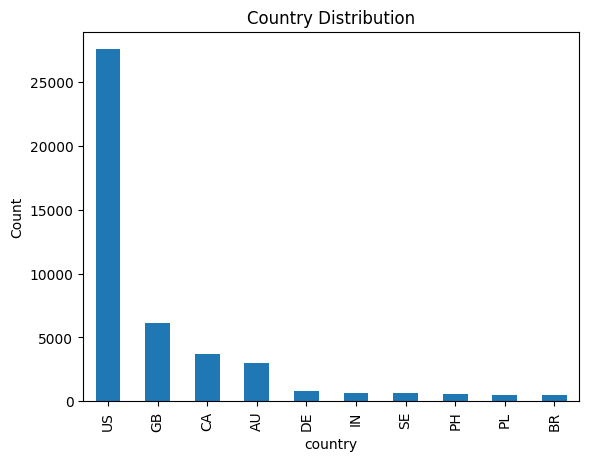

In [7]:
import matplotlib.pyplot as plt

print("The data is sourced from ",data["country"].nunique()-1, " different countries. One was subtrcacted from this count because it corresponds to missing values.")
print("The histogram below shows the distribution of data among top 10 countries.")
data["country"].value_counts().head(10).plot(kind="bar")
plt.xticks(rotation=90)
plt.ylabel("Count")
plt.title("Country Distribution")
plt.show()

The dataset is primarily sourced from four countries: US, GB, CA, and AU.

In [8]:
print("Number of data entries from IN are ", (data["country"] == "IN").sum())

Number of data entries from IN are  650


Thus, even for countries that are not dominant sources of data, a non-negligible number of responses are present, allowing for exploratory, descriptive comparisons across geographical groups at later stages of analysis.

### Step 6: Validating response entries and missing-value encoding
The 22 item-response columns are checked for invalid entries. Valid values are {0, 1, 2, 3, 4, 5}, where 0 denotes a missing response and values 1–5 represent ordinal levels of agreement with the corresponding statement.


In [9]:
cols = ["HSNS1","HSNS2","HSNS3","HSNS4","HSNS5","HSNS6","HSNS7","HSNS8","HSNS9","HSNS10",
        "DDP1", "DDP2", "DDP3", "DDP4",
        "DDN1", "DDN2", "DDN3", "DDN4",
        "DDM1", "DDM2", "DDM3", "DDM4"]

# The item-response columns are expected to contain only the values
# {0, 1, 2, 3, 4, 5}, where 0 denotes a missing response and 1–5 are valid ordinal responses.
allowed_values = [0, 1, 2, 3, 4, 5]

# Identify any entries that violate the expected encoding.
# This flags values outside the allowed set, including NaNs if present.
invalid_mask = ~data[cols].isin(allowed_values)

# Count the total number of invalid entries across all response columns
invalid_count = invalid_mask.sum().sum()

if invalid_count > 0:
    print(f"Found {invalid_count} invalid entries (including missing or out-of-range values).")
    
    # Display a small sample of the problematic entries to verify
    # where the violations occur (row index, column, and value).
    errors = data[cols][invalid_mask].stack(dropna=False)
    
    print("\nSample of invalid entries (Index, Column, Value):")
    print(errors.head(20))
else:
    print("Clean. All response entries follow the expected 0 to 5 encoding.")

# A nested-loop version was used initially for validation but replaced
# with a vectorized check for clarity and efficiency.


Clean. All response entries follow the expected 0 to 5 encoding.


No invalid entries are present in the 22 item-response columns under the defined encoding scheme.

Next, the prevalence of missing responses (encoded as 0) is examined across the item-response columns.

In [10]:
mask = (data[["HSNS1","HSNS2","HSNS3","HSNS4","HSNS5","HSNS6","HSNS7","HSNS8","HSNS9","HSNS10"]] == 0)
perc0 = mask.sum().sum() / (mask.shape[0] * mask.shape[1]) * 100
print(perc0, " percent of the total number of entries are 0.")

0.513105999131928  percent of the total number of entries are 0.


Next, the number of missing responses (encoded as 0) is examined across the item-response columns before deciding on an imputation strategy. Rows with more than two missing entries are flagged for potential exclusion, as excessive missingness can distort downstream analysis and lead to unreliable conclusions.

Checking zeros in HSNS: ['HSNS1', 'HSNS2', 'HSNS3', 'HSNS4', 'HSNS5', 'HSNS6', 'HSNS7', 'HSNS8', 'HSNS9', 'HSNS10']

--- Frequency Table: Zeros per Row (HSNS) ---
Zeros      | Users     
-------------------------
1          | 1332      
2          | 70        
3          | 13        
4          | 4         
5          | 9         
6          | 37        
7          | 10        
8          | 8         
9          | 59        
10         | 26        

Number of rows marked for removal (HSNS > 2 zeros): 166


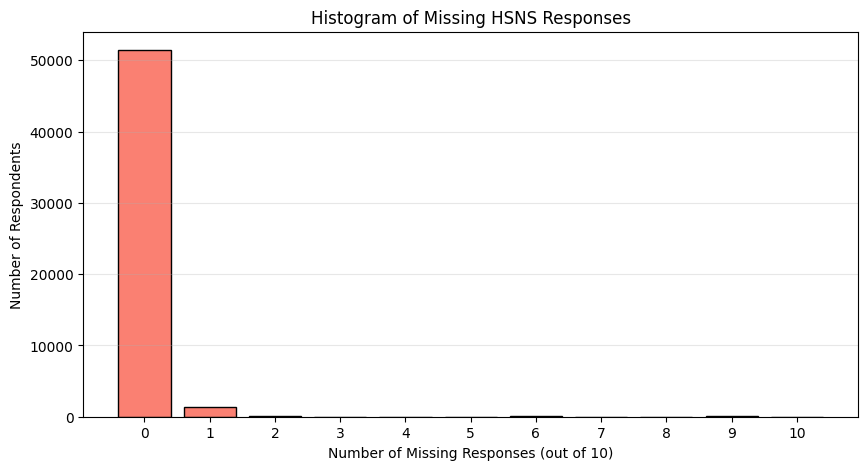



Checking zeros in DD: ['DDP1', 'DDP2', 'DDP3', 'DDP4', 'DDN1', 'DDN2', 'DDN3', 'DDN4', 'DDM1', 'DDM2', 'DDM3', 'DDM4']

--- Frequency Table: Zeros per Row (DD) ---
Zeros      | Users     
-------------------------
1          | 1863       
2          | 135        
3          | 54         
4          | 4          
5          | 4          
6          | 25         
7          | 4          
8          | 6          
9          | 21         
10         | 1          
11         | 6          
12         | 40         

Number of rows marked for removal (DD Criteria): 191


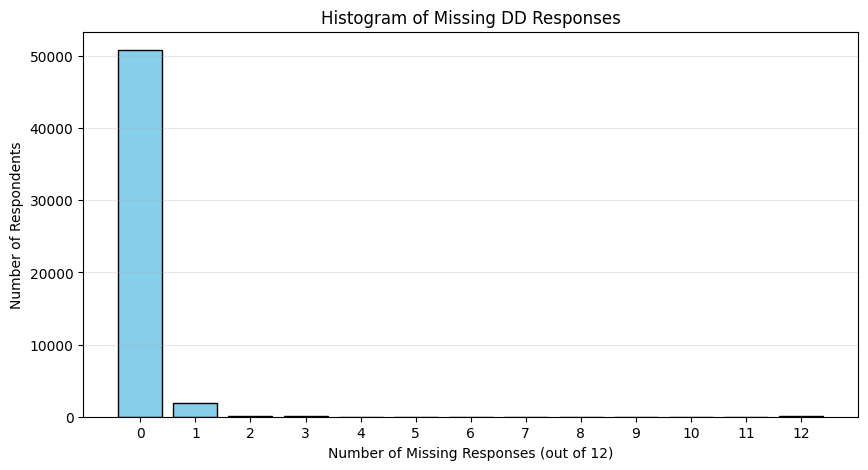

In [11]:
# Define all columns based on your list
cols = ["ID","HSNS1","HSNS2","HSNS3","HSNS4","HSNS5",
        "HSNS6","HSNS7","HSNS8","HSNS9","HSNS10",
        "DDP1","DDP2","DDP3","DDP4","DDN1","DDN2","DDN3","DDN4",
        "DDM1","DDM2","DDM3","DDM4","accuracy"]

# Create a single working copy for analysis
temp = data[cols]

# Define column groups
hsns_cols = cols[1:11]   # HSNS1 to HSNS10
dd_cols   = cols[11:23]  # DDP1 to DDM4

# ==========================================
# PART 1: HSNS ANALYSIS
# ==========================================
print(f"Checking zeros in HSNS: {hsns_cols}")

# Count zeros
zeros_per_row_HSNS = (temp[hsns_cols] == 0).sum(axis=1)

# Frequency Table
print("\n--- Frequency Table: Zeros per Row (HSNS) ---")
counts_hsns = zeros_per_row_HSNS.value_counts().sort_index()
total_users = len(temp)
cumulative_loss = 0

print(f"{'Zeros':<10} | {'Users':<10}")
print("-" * 25)

for num_zeros, count in counts_hsns.items():
    if num_zeros == 0: continue
    print(f"{num_zeros:<10} | {count:<10}")

# Flag rows: > 2 missing HSNS responses
many0rows_HSNS = temp.loc[zeros_per_row_HSNS > 2, "ID"].tolist()
print("\nNumber of rows marked for removal (HSNS > 2 zeros):", len(many0rows_HSNS))

# Plot HSNS
plt.figure(figsize=(10, 5))
plt.bar(counts_hsns.index, counts_hsns.values, color='salmon', edgecolor='black')
plt.title('Histogram of Missing HSNS Responses')
plt.xlabel('Number of Missing Responses (out of 10)')
plt.ylabel('Number of Respondents')
plt.xticks(range(0, 11))
plt.grid(axis='y', alpha=0.3)
plt.show()

print("\n" + "="*50 + "\n")

# ==========================================
# PART 2: DIRTY DOZEN (DD) ANALYSIS
# ==========================================
print(f"Checking zeros in DD: {dd_cols}")

# Count zeros (Global)
zeros_per_row_DD = (temp[dd_cols] == 0).sum(axis=1)

# Frequency Table
print("\n--- Frequency Table: Zeros per Row (DD) ---")
counts_dd = zeros_per_row_DD.value_counts().sort_index()
cumulative_loss = 0

print(f"{'Zeros':<10} | {'Users':<10}")
print("-" * 25)

for num_zeros, count in counts_dd.items():
    if num_zeros == 0: continue
    print(f"{num_zeros:<10} | {count:<10} ")

# Check Sub-sections (DDP, DDN, DDM are 4 items each)
# dd_cols list indices: 0-4 (P), 4-8 (N), 8-12 (M)
zeros_sub1 = (temp[dd_cols[0:4]] == 0).sum(axis=1)
zeros_sub2 = (temp[dd_cols[4:8]] == 0).sum(axis=1)
zeros_sub3 = (temp[dd_cols[8:12]] == 0).sum(axis=1)

# Logic: Global > 2 OR Sub-section > 1
cond_global = zeros_per_row_DD > 2
cond_sub1   = zeros_sub1 > 1
cond_sub2   = zeros_sub2 > 1
cond_sub3   = zeros_sub3 > 1

remove_mask_DD = cond_global | cond_sub1 | cond_sub2 | cond_sub3
many0rows_DD = temp.loc[remove_mask_DD, "ID"].tolist()

print("\nNumber of rows marked for removal (DD Criteria):", len(many0rows_DD))

# Plot DD
plt.figure(figsize=(10, 5))
plt.bar(counts_dd.index, counts_dd.values, color='skyblue', edgecolor='black')
plt.title('Histogram of Missing DD Responses')
plt.xlabel('Number of Missing Responses (out of 12)')
plt.ylabel('Number of Respondents')
plt.xticks(range(0, 13))
plt.grid(axis='y', alpha=0.3)
plt.show()

Rows with more than two missing responses constitute a small fraction of the dataset (166 entries). These rows are flagged for exclusion due to excessive missingness, and their corresponding `ID` values are stored in the `many0rows_HSNS` array defined above.

First, we note IDs and remove rows with more than one 0s in the three 4-column sections, and more than two 0s in 12 sections total.


Based on the above diagnostic, these rows are excluded from further analysis.

In [12]:
# 1. Combine the two lists of IDs to remove
# We use set() to merge them and remove any duplicates (in case a row failed both checks)
many_missing_rows = list(set(many0rows_HSNS) | set(many0rows_DD))

ini = len(data)

# 2. Drop the rows
# We filter where ID is NOT in our removal list
data = data[~data["ID"].isin(many_missing_rows)].copy()

# Alternatively, using your drop syntax:
# data.drop(data[data["ID"].isin(many_missing_rows)].index, inplace=True)

dropped_now = ini - len(data)

print(f"Total unique rows removed (Missingness > threshold): {dropped_now}")
print(f"The length of the dataset is now: {len(data)}")

Total unique rows removed (Missingness > threshold): 223
The length of the dataset is now: 52768


For the remaining rows with missing HSNS responses (encoded as 0), within-row mean imputation is applied to the HSNS items. Now, for rest of the 0s, we impute their corresponding DD sub-section mean since we ensured that for the remaining data, we have atleast three valid entries in each subsection. First, we note IDs and remove rows with more than one 0s in the three 4-column sections, and more than two 0s in 12 sections total.

In [13]:
# 1. SETUP
# Create the copy once
data_imputed = data.copy(deep=True)

# Define the groups that share a mean.
# Logic: We calculate the mean for the *specific group* to fill gaps in that group.
imputation_groups = [
    cols[1:11],    # HSNS (All 10 items)
    cols[11:15],   # DDP (First 4 DD items)
    cols[15:19],   # DDN (Middle 4 DD items)
    cols[19:23]    # DDM (Last 4 DD items)
]

print("Starting Imputation...")

# 2. THE LOOP
# Instead of writing the logic 4 times, we write it once and loop through the groups.
for group in imputation_groups:
    print(f"Imputing group: {group[0]} to {group[-1]}")
    
    # A. Replace 0 with NaN for this group
    data_imputed[group] = data_imputed[group].replace(0, np.nan)
    
    # B. Extract as matrix
    vals = data_imputed[group].values
    
    # C. Compute Row-Wise Mean (ignoring NaNs)
    # Note: If a row is ALL NaNs, this returns NaN (which is correct/safe)
    with np.errstate(invalid='ignore'): # Suppress warning for all-NaN rows
        means = np.nanmean(vals, axis=1, keepdims=True)
    
    # D. Impute (Fill NaNs with the calculated mean)
    vals = np.where(np.isnan(vals), means, vals)
    
    # E. Write back and Round
    data_imputed[group] = np.round(vals, 2)

# 3. VERIFICATION
# Check total missing values in the relevant columns
all_target_cols = cols[1:23] # All HSNS and DD columns
total_missing = data_imputed[all_target_cols].isna().sum().sum()

print("-" * 30)
if total_missing == 0:
    print("SUCCESS: All zeros imputed with person-specific means.")
else:
    print(f"WARNING: {total_missing} missing values remain (likely rows that were empty).")

# Optional: Preview the data
# print(data_imputed[all_target_cols].head())

Starting Imputation...
Imputing group: HSNS1 to HSNS10
Imputing group: DDP1 to DDP4
Imputing group: DDN1 to DDN4
Imputing group: DDM1 to DDM4
------------------------------
SUCCESS: All zeros imputed with person-specific means.


In [14]:
# Boolean mask for out-of-range values
out_of_range = (data_imputed[cols[1:23]] < 1) | (data_imputed[cols[1:23]] > 5)

# Count how many violations exist
violations = out_of_range.sum().sum()

print("Number of out-of-range entries:", violations)

nan_count = data_imputed[cols[1:23]].isna().sum().sum()
print("Number of remaining NaN values:", nan_count)

Number of out-of-range entries: 0
Number of remaining NaN values: 0


At this stage, the data has been cleaned at the entry level. Next, a diagnostic approach is used to identify highly inconsistent response patterns that may reflect low-quality or unreliable responses. Such patterns, if left unaddressed, can introduce spurious outliers and distort downstream analysis.

### Step 7: Careless response detection : Inconsistent responses
As an additional diagnostic, pairwise correlations among all 22 entries are examined to identify item relationships that may reflect logical consistency or inconsistency in responses.

Step 7a: Using logically and statistically backed correlations to find the inconsistency score.

In [15]:
# Subset the imputed dataset to HSNS items
temp2 = data_imputed[cols]

# Compute the pairwise Pearson correlation matrix for HSNS items.
# This is used as a diagnostic to identify strongly related item pairs.
corr = np.corrcoef(temp2[cols[1:23]].values, rowvar=False)

# Extract and rank off-diagonal correlations to identify
# the strongest relationships between item pairs.
un_vals = []
for i in range(len(corr) - 1):
    for j in range(i + 1, len(corr)):
        un_vals.append((corr[i][j], (i+1, j+1)))

print(sorted(un_vals, reverse=True))

[(0.70553459655747, (19, 22)), (0.6149483414107474, (15, 16)), (0.6069264909767665, (11, 12)), (0.6001307885050657, (11, 13)), (0.5831106451965901, (12, 22)), (0.5603446254544855, (11, 22)), (0.5516939314635172, (19, 20)), (0.5358649171600204, (2, 7)), (0.5328605235363852, (11, 19)), (0.5290234352623477, (5, 10)), (0.5259088829917127, (20, 22)), (0.5164356273137072, (13, 22)), (0.5146200882242222, (15, 17)), (0.5077814601828612, (18, 22)), (0.5060942792504025, (12, 19)), (0.5016558128276375, (12, 13)), (0.4974342409570432, (19, 21)), (0.49419599576783424, (16, 17)), (0.49057917473653934, (5, 8)), (0.4712888716120424, (5, 13)), (0.46941794480880805, (21, 22)), (0.46352440769566433, (18, 19)), (0.46034520268892515, (8, 13)), (0.4598804917181771, (13, 19)), (0.4476559429439283, (1, 8)), (0.4472981442912816, (5, 11)), (0.4463098175989485, (10, 13)), (0.44123916065748514, (5, 12)), (0.4400631176074679, (17, 22)), (0.43871776779650923, (12, 20)), (0.43865126252841435, (20, 21)), (0.437226667

### Methodology Reference: Detecting Careless Respondents

To rigorously identify inconsistent response patterns, we adopted the framework established by **Meade & Craig (North Carolina State University)** in their paper *Identifying Careless Responses in Survey Data*.

In their study, the authors emphasized using only strongly correlated pairs to avoid noise:

> "However, rather than using 30 item pairs, we sought to ensure item pairs were truly opposite in meaning and only retained item pairs with the correlation stronger than -.60. As a result, this index included only five item pairs."

**Our Adaptation:**
Following this methodology, we analyzed the correlation matrix of our specific dataset. Based on the empirical data structure, we selected a cutoff of **r > 0.50** to ensure strict logical relatedness between items. This filtering process identified **three primary item pairs**, which served as the basis for our Inconsistency Score.

Since all our questions are positively phrased we need to look for correlations more than 0.5 or some logical correlations a bit smaller than 0.5 can also be used.

Having examined the correlation structure among HSNS items and imputed missing responses, an inconsistency score is defined and computed for each respondent based on selected item-pair deviations. Only the both way logical correlations went into the calculation of Incosistency score and they all happened to be among HSNS columns.

In [16]:
# Inconsistency score calculation
# The function f penalizes large deviations between paired HSNS item responses.
# Differences below the threshold are ignored to avoid over-penalizing minor noise.
def f(x):
    if x >= 2:
        return (x - 2)**2
    else:
        return 0


# Initialize inconsistency score vector
I = np.zeros(len(temp2))

# Compute unified inconsistency score for each respondent.
# This sums all HSNS and Dirty Dozen logical pairs in one block.
for i in range(len(temp2)):
    I[i] = (
        # HSNS Pairs (Indices 4/9, 1/6, 4/7)
        corr[4][9]**2 * f(abs(temp2.iloc[i, 5] - temp2.iloc[i, 10])) +
        corr[1][6]**2 * f(abs(temp2.iloc[i, 2] - temp2.iloc[i, 7])) +
        corr[4][7]**2 * f(abs(temp2.iloc[i, 5] - temp2.iloc[i, 8])) 
    )

temp2['In_man_corr'] = I # the name marks that this inconsistency score based on scalar correlations
                         # filtered with the human logic

/tmp/ipykernel_14526/265716866.py:24: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  temp2['In_man_corr'] = I # the name marks that this inconsistency score based on scalar correlations


Merging the two tables on ID column.

In [17]:
print(temp2.head())
print(data_imputed.head())

data_imputed = pd.merge(data_imputed, temp2[['ID', 'In_man_corr']], on='ID', how='left')

   ID  HSNS1  HSNS2  HSNS3  HSNS4  HSNS5  HSNS6  HSNS7  HSNS8  HSNS9  ...  \
0   0    2.0    4.0    5.0    1.0    4.0    5.0    4.0    3.0    3.0  ...   
1   1    4.0    2.0    2.0    4.0    3.0    4.0    4.0    5.0    4.0  ...   
2   2    5.0    5.0    5.0    4.0    2.0    5.0    5.0    4.0    4.0  ...   
3   3    4.0    1.0    2.0    2.0    4.0    5.0    2.0    2.0    5.0  ...   
4   4    5.0    3.0    4.0    5.0    5.0    5.0    4.0    5.0    4.0  ...   

   DDN1  DDN2  DDN3  DDN4  DDM1  DDM2  DDM3  DDM4  accuracy  In_man_corr  
0   2.0   1.0   1.0   1.0   1.0   2.0   2.0   1.0      98.0          0.0  
1   3.0   2.0   2.0   3.0   4.0   4.0   4.0   3.0      95.0          0.0  
2   4.0   2.0   4.0   3.0   3.0   4.0   4.0   2.0      80.0          0.0  
3   5.0   5.0   4.0   1.0   4.0   2.0   3.0   4.0      99.0          0.0  
4   4.0   2.0   5.0   2.0   4.0   4.0   1.0   5.0      90.0          0.0  

[5 rows x 25 columns]
   HSNS1  HSNS2  HSNS3  HSNS4  HSNS5  HSNS6  HSNS7  HSNS8  HSNS9

The selected item pairs reflect strong and interpretable correlations identified earlier, and the resulting inconsistency scores are used as a diagnostic for highly irregular response patterns.

Next, the distribution of the inconsistency scores is examined to assess the prevalence of highly irregular response patterns in the dataset.

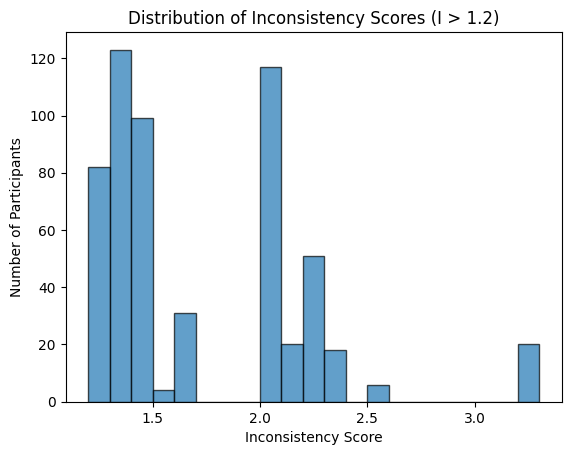

In [18]:
import matplotlib.pyplot as plt
scores = data_imputed[data_imputed['In_man_corr'] > 1.2]['In_man_corr']
bins = np.arange(1.2, 3.2 + 0.1, 0.1)
plt.hist(scores, bins=bins, edgecolor='black', alpha=0.7)
plt.title('Distribution of Inconsistency Scores (I > 1.2)')
plt.xlabel('Inconsistency Score')
plt.ylabel('Number of Participants')
plt.show()

A pronounced separation is observed in the upper tail of the inconsistency score distribution, indicating the presence of a distinct subset of responses with markedly different structural properties. This separation suggests systematic deviation rather than random noise.

At this stage, rows exceeding a high inconsistency threshold are flagged for further inspection rather than immediately discarded. In the following steps, this observation is formalized using statistical tests to assess whether the separation is unlikely to arise under typical response behavior.

It is important to emphasize that this diagnostic does not attempt to label individuals or infer psychological traits. The inconsistency score reflects response structure only and is used solely for data-quality assessment.


The indices of rows exceeding a high inconsistency threshold (I ≥ 1.9) are recorded. This threshold corresponds to a well-separated high-inconsistency subset observed in the score distribution.


Rows with very high inconsistency scores (I ≥ 2.0) are inspected to qualitatively assess whether their response patterns exhibit obvious structural irregularities.

In [19]:
outlier_corr_man_ID = temp2[temp2['In_man_corr'] >= 1.9]["ID"].tolist()
print("total number rows passing this threshold are:", len(outlier_corr_man_ID))
print("values for inconsistent rows:")
print(data_imputed.loc[data_imputed["ID"].isin(outlier_corr_man_ID), cols[1:23]].head())

total number rows passing this threshold are: 232
values for inconsistent rows:
     HSNS1  HSNS2  HSNS3  HSNS4  HSNS5  HSNS6  HSNS7  HSNS8  HSNS9  HSNS10  \
120   5.00    5.0    5.0    5.0    1.0    1.0    1.0    5.0    5.0     5.0   
272   2.78    1.0    1.0    1.0    5.0    5.0    5.0    5.0    1.0     1.0   
724   5.00    5.0    2.0    4.0    1.0    5.0    5.0    5.0    4.0     5.0   
740   5.00    1.0    5.0    5.0    1.0    5.0    1.0    5.0    5.0     5.0   
746   5.00    1.0    5.0    1.0    5.0    5.0    5.0    4.0    5.0     1.0   

     ...  DDP3  DDP4  DDN1  DDN2  DDN3  DDN4  DDM1  DDM2  DDM3  DDM4  
120  ...   5.0   5.0   5.0   1.0   5.0   5.0   5.0   5.0   5.0   5.0  
272  ...   5.0   5.0   1.0   1.0   1.0   1.0   5.0   5.0   5.0   1.0  
724  ...   5.0   3.0   5.0   4.0   4.0   4.0   5.0   5.0   4.0   3.0  
740  ...   5.0   3.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0   5.0  
746  ...   1.0   1.0   5.0   5.0   5.0   1.0   1.0   4.0   5.0   1.0  

[5 rows x 22 columns]


Inspection of these rows reveals highly polarized response patterns, with repeated extreme scores (e.g., alternating 1s and 5s) across multiple items. Such patterns are characteristic of non-deliberative responding and exhibit strong internal contradictions relative to the expected item relationships.


### Step 7b: Row-level inconsistency detection using pairwise joint distributions combined with logical pairs

Next, a row-level diagnostic is constructed to characterize response consistency using pairwise joint response distributions.

For each pair of HSNS items (45 pairs in total), a 5×5 joint density matrix is estimated, representing the empirical distribution of score combinations for that item pair. These density matrices are computed using accuracy-weighted responses and normalized to form valid probability mass functions.

These pairwise distributions serve as the basis for defining inconsistency measures by identifying response combinations that are rare under the empirical joint structure. Rows that accumulate large penalties under such measures are flagged for further inspection.

In [20]:
# Working copy for joint-distribution construction
cols = ["ID","HSNS1","HSNS2","HSNS3","HSNS4","HSNS5",
        "HSNS6","HSNS7","HSNS8","HSNS9","HSNS10",
        "DDP1","DDP2","DDP3","DDP4","DDN1","DDN2","DDN3","DDN4",
        "DDM1","DDM2","DDM3","DDM4","accuracy"]
temp1 = data_imputed[cols].copy()

# HSNS items are ordinal (1–5); convert to integer indices (0–4)
# to facilitate construction of 5×5 joint response matrices
temp1.iloc[:, 1:23] = temp1.iloc[:, 1:23].round(0).astype(int)
temp1.iloc[:, 1:23] = temp1.iloc[:, 1:23] - 1

n_items = 22

# Tensor storing pairwise joint response distributions:
# dimensions [item_i, item_j, score_i, score_j]
dens = np.zeros((n_items, n_items, 5, 5))

print("Building pairwise joint density matrices...")

for i in range(n_items):
    for j in range(i + 1, n_items):
        
        # FIX: Added +1 to skip the 'ID' column at index 0
        col_i = temp1.iloc[:, i + 1]
        col_j = temp1.iloc[:, j + 1]
        
        # Accuracy-weighted joint distribution for item pair (i, j)
        matrix, _, _ = np.histogram2d(
            col_i, col_j,
            bins=range(6), # Edges: 0, 1, 2, 3, 4, 5
            weights=temp1["accuracy"] / 100,
            density=True
        )
        
        # Store symmetrically
        dens[i, j, :, :] = matrix
        dens[j, i, :, :] = matrix.T

print("Done.")


Building pairwise joint density matrices...
Done.


In [21]:
f, s = 5,0

# Sanity check: each joint distribution should sum to 1
print(f"Sum of Pair ({f},{s}): {dens[f, s].sum():.2f}")

# Example joint distribution for inspection
dens[f, s]

Sum of Pair (5,0): 1.00


array([[0.00705048, 0.00339382, 0.00262358, 0.00341991, 0.00250356],
       [0.00571135, 0.02320453, 0.01400181, 0.02930134, 0.00748869],
       [0.00584793, 0.02637386, 0.02778173, 0.05052979, 0.01819582],
       [0.01024363, 0.05336357, 0.05890476, 0.19281355, 0.08398634],
       [0.0152494 , 0.02606463, 0.03298556, 0.09995629, 0.19900407]])

The joint density matrices are defined over score indices 0–4 corresponding to all responses 1–5.

To identify item pairs with meaningful logical structure, low-density regions of these matrices are examined. In particular, score combinations whose empirical density falls below a small threshold are treated as rare under typical responding. Based on exploratory inspection, a threshold of 0.005 is used to highlight such low-probability regions while avoiding spurious sparsity effects.

The neutral response category (original score = 3, index = 2) is excluded from contradiction checks, as neutrality is not inherently inconsistent with other item responses.

Only item pairs exhibiting clear low-density regions under this criterion are retained for subsequent inconsistency scoring.


In [22]:
# Candidate item pairs (1-based indices)
# Selected ONLY for strict logical/definitional overlap.
possible_corr_pairs = [
    # --- HSNS Pairs ---
    (2, 7),   # HSNS2 (Hurt by ridicule) & HSNS7 (Take remarks personally). 
              # Logic: Cause & Effect.
    (5, 10),  # HSNS5 (Don't worry about others) & HSNS10 (Annoyed by others' troubles). 
              # Logic: Attitude Synonym.
    (3, 6),  # HSNS3 (Feel different) & HSNS6 (Uncomfortable with others).
    (5, 8),   # HSNS5 (Don't worry about others) & HSNS8 (Forget existence of others). 
              # Logic: Definition of self-absorption.

    # --- DDP Pairs (Psychopathy) ---
    (11, 12), # DDP1 (Lack remorse) & DDP2 (Unconcerned with morality). 
              # Logic: Impossible to feel remorse if you don't care about morality.
    (11, 13), # DDP1 (Lack remorse) & DDP3 (Callous). 
              # Logic: Synonym.
    (12, 13), # DDP2 (No morality) & DDP3 (Callous).
              # Logic: Synonym.

    # --- DDN Pairs (Narcissism) ---
    (15, 16), # DDN1 (Want admiration) & DDN2 (Want attention).
              # Logic: Admiration is a type of attention. 
              # (Excluded Admiration/Favors as it is not strictly logical).

    # --- DDM Pairs (Machiavellianism) ---
    (19, 20), # DDM1 (Manipulate) & DDM2 (Used deceit/lies).
              # Logic: Lying to get your way IS manipulation.
    (19, 21)  # DDM1 (Manipulate) & DDM3 (Used flattery).
              # Logic: Flattery to get your way IS manipulation.
]

corr_pairs = []

# Threshold for identifying rare (low-density) score combinations
threshold = 0.005

print(f"Density values below the threshold ({threshold}):")

def get_label(idx):
    # HSNS: Items 1-10
    if 1 <= idx <= 10:
        return f"HSNS{idx}"
    # DDP: Items 11-14 (Subtract 10 to get DDP1-4)
    elif 11 <= idx <= 14:
        return f"DDP{idx - 10}"
    # DDN: Items 15-18 (Subtract 14 to get DDN1-4)
    elif 15 <= idx <= 18:
        return f"DDN{idx - 14}"
    # DDM: Items 19-22 (Subtract 18 to get DDM1-4)
    elif 19 <= idx <= 22:
        return f"DDM{idx - 18}"
    else:
        return f"Unknown{idx}"


for i in range(n_items):
    for j in range(i + 1, n_items):
        # Exclude the neutral category (index 2) from contradiction checks
        for k in [0, 1, 3, 4]:
            for l in [0, 1, 3, 4]:
                # Focus only on preselected item pairs and strong score disagreements
                if (
                    dens[i][j][k][l] < threshold and
                    abs(k - l) > 2 and
                    (i + 1, j + 1) in possible_corr_pairs
                ):
                    corr_pairs.append((i + 1, j + 1, k + 1, l + 1, dens[i][j][k][l]))
                    # Generate correct labels
                    name_i = get_label(i + 1)
                    name_j = get_label(j + 1)
                    
                    print(
                        f"({name_i}, {name_j}) -> "
                        f"Scores ({k+1}, {l+1}) : Density {dens[i][j][k][l]:.4f}"
                    )


Density values below the threshold (0.005):
(HSNS2, HSNS7) -> Scores (4, 1) : Density 0.0043
(HSNS2, HSNS7) -> Scores (5, 1) : Density 0.0026
(HSNS2, HSNS7) -> Scores (5, 2) : Density 0.0048
(HSNS3, HSNS6) -> Scores (4, 1) : Density 0.0042
(HSNS3, HSNS6) -> Scores (5, 1) : Density 0.0030
(HSNS5, HSNS10) -> Scores (1, 4) : Density 0.0026
(HSNS5, HSNS10) -> Scores (1, 5) : Density 0.0024
(HSNS5, HSNS10) -> Scores (2, 5) : Density 0.0042
(DDP1, DDP2) -> Scores (1, 5) : Density 0.0048
(DDP1, DDP3) -> Scores (5, 1) : Density 0.0042
(DDP2, DDP3) -> Scores (5, 1) : Density 0.0044
(DDN1, DDN2) -> Scores (1, 4) : Density 0.0030
(DDN1, DDN2) -> Scores (1, 5) : Density 0.0012
(DDN1, DDN2) -> Scores (2, 5) : Density 0.0009
(DDM1, DDM2) -> Scores (4, 1) : Density 0.0043
(DDM1, DDM2) -> Scores (5, 1) : Density 0.0020
(DDM1, DDM2) -> Scores (5, 2) : Density 0.0024


as can be seen all important correlations one sided and therefore scalar correlation was not a good tool for filtration.

Based on the item pairs that satisfy both theoretical expectations and empirical rarity criteria, a probability-density–based inconsistency score, I_dens, is defined. This score penalizes response patterns that fall into low-probability regions of the corresponding joint density matrices, using only the subset of item pairs that exhibit clear logical structure.


In [23]:
# Initialize density-based inconsistency score
I_dens = np.zeros(len(data_imputed))
epsilon = 1e-7  # Numerical stability for log

# Define rare response configurations ("traps")
# Format: (Item_Index_0_Based, Item_Index_0_Based, Score_0_Based, Score_0_Based)
# MAPPING KEY:
# HSNS1-10 : 0-9
# DDP1-4   : 10-13
# DDN1-4   : 14-17
# DDM1-4   : 18-21

traps = [
    # --- HSNS TRAPS ---
    # (HSNS2, HSNS7) -> Scores (4, 1) | (5, 1) | (5, 2)
    (1, 6, 3, 0),
    (1, 6, 4, 0),
    (1, 6, 4, 1),

    # (HSNS3, HSNS6) -> Scores (4, 1) | (5, 1)
    (2, 5, 3, 0),
    (2, 5, 4, 0),

    # (HSNS5, HSNS10) -> Scores (1, 4) | (1, 5) | (2, 5)
    (4, 9, 0, 3),
    (4, 9, 0, 4),
    (4, 9, 1, 4),

    # --- DDP TRAPS (Psychopathy) ---
    # (DDP1, DDP2) -> Scores (1, 5) => Indices 10, 11
    (10, 11, 0, 4),

    # (DDP1, DDP3) -> Scores (5, 1) => Indices 10, 12
    (10, 12, 4, 0),

    # (DDP2, DDP3) -> Scores (5, 1) => Indices 11, 12
    (11, 12, 4, 0),

    # --- DDN TRAPS (Narcissism) ---
    # (DDN1, DDN2) -> Scores (1, 4) | (1, 5) | (2, 5) => Indices 14, 15
    (14, 15, 0, 3),
    (14, 15, 0, 4),
    (14, 15, 1, 4),

    # --- DDM TRAPS (Machiavellianism) ---
    # (DDM1, DDM2) -> Scores (4, 1) | (5, 1) | (5, 2) => Indices 18, 19
    (18, 19, 3, 0),
    (18, 19, 4, 0),
    (18, 19, 4, 1)
]

print(f"Applying {len(traps)} low-density response configurations...")

for col_a, col_b, val_a, val_b in traps:
    
    # Identify respondents exhibiting this specific rare combination
    # NOTE: We add +1 to column index to skip the 'ID' column in temp1
    caught_mask = (
        (temp1.iloc[:, col_a + 1] == val_a) &
        (temp1.iloc[:, col_b + 1] == val_b)
    )
    
    # Lookup joint density for this configuration
    # dens is 0-based relative to items, so we use col_a/col_b directly
    trap_density = dens[col_a, col_b, val_a, val_b]
    
    # Assign penalty proportional to negative log-probability
    penalty = -np.log(trap_density + epsilon)
    
    # Accumulate penalty
    I_dens[caught_mask] += penalty

# Store results
data_imputed['In_man_dens'] = I_dens
print("Done.")

# Statistics Output
outlier_dens_man_ID = data_imputed[data_imputed['In_man_dens'] >= 10]["ID"].tolist()
outlier_count = len(outlier_dens_man_ID)
print(f"Max Score: {data_imputed['In_man_dens'].max():.4f}")
print(f"Users with Score > 10: {outlier_count}")
print(f"Users with Score > 0: {(data_imputed['In_man_dens'] > 0).sum()}")

Applying 17 low-density response configurations...


Done.
Max Score: 24.2288
Users with Score > 10: 274
Users with Score > 0: 2586


mathematically 8/75 responses would show I > 0 if all were careless or random responders. This test verifies our assumption that the careless responders is actually a minority and hence can be filtered effectively through statistical measures.

5400 was expected number for all random responses and we got 1418 displaying that careless responders are less than 25%.

The threshold of 10 is chosen to tolerate isolated rare response configurations with moderate penalty and isolated the island in the plot shown below, while ensuring that rows exhibiting either a single extreme inconsistency or multiple moderate inconsistencies are flagged. This balances robustness to occasional anomalies against sensitivity to systematically irregular response patterns.

The histogram below illustrates the distribution of the density-based inconsistency scores and provides empirical support for the chosen threshold.


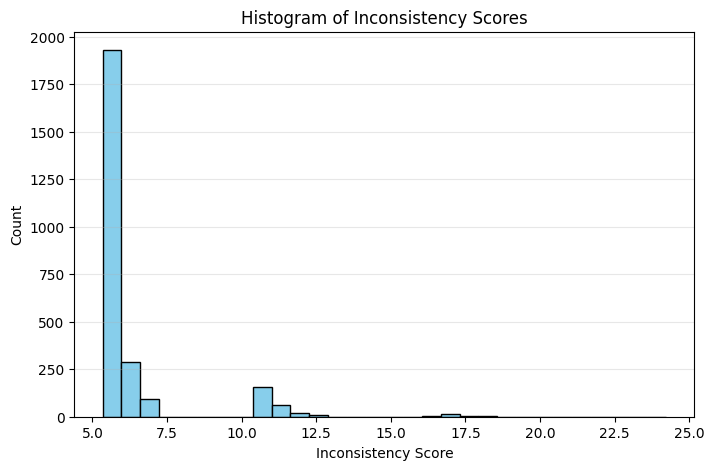

In [24]:
plt.figure(figsize=(8,5))
plt.hist(data_imputed['In_man_dens'][data_imputed['In_man_dens'] > 0], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Inconsistency Score")
plt.ylabel("Count")
plt.title("Histogram of Inconsistency Scores")
plt.grid(axis='y', alpha=0.3)
plt.show()

### Step 7c: Using solely statistically backed correlations to find the inconsistency score with no restriction on correlation score.
As a complementary check, an overall density-based inconsistency score, `In_machine_dens`, is constructed without relying on any manually selected item pairs. This score aggregates joint response densities across all HSNS item pairs and is used to examine whether extreme inconsistency values emerge organically from the full distributional structure.

This serves as an independent diagnostic to assess whether rows flagged by the hypothesis-driven methods also appear as statistical outliers under a fully agnostic formulation.


In [25]:
# Number of respondents
n = data_imputed.shape[0]
n_items = 22  # Total items (HSNS + DD)

# Initialize overall density-based inconsistency score
# Starts at 1 and accumulates pairwise joint densities multiplicatively
Io_Total = np.ones(n)

# Extract all responses as integer indices (0–4)
# scores column 0 = Item 1 (HSNS1)
scores = temp1.iloc[:, 1:23].astype(int).values

print("Calculating full machine density score...")

# Aggregate joint densities across ALL item pairs
# Changed range(10) to range(n_items) to include DD-vs-DD contradictions
for j in range(n_items):
    for k in range(j + 1, n_items):
        
        # FIX: Removed the '+1' because 'scores' implies ID is already gone.
        a = scores[:, j]
        b = scores[:, k]

        # Lookup joint density for each respondent's score combination
        dens_vals = dens[j, k, a, b]
        
        # Multiply densities (scaled for numerical stability)
        # We multiply by 25 (1/0.04) so that "random" guessing = 1.0
        # Values < 1.0 decrease the score (consistent), Values > 1.0 increase it (rare/inconsistent)
        Io_Total *= dens_vals * 25

# Store the agnostic density-based score
# Using a small epsilon inside log to prevent -inf if Io_Total hits 0
data_imputed['In_machine_dens'] = -np.log(Io_Total + 1e-300)

print("Done.")

# Quick stats
print(f"Max Inconsistency Score: {data_imputed['In_machine_dens'].max():.2f}")
print(f"Mean Inconsistency Score: {data_imputed['In_machine_dens'].mean():.2f}")

Calculating full machine density score...
Done.
Max Inconsistency Score: 255.06
Mean Inconsistency Score: -69.24


A plot in order to decide the right value of threshold is shown below.

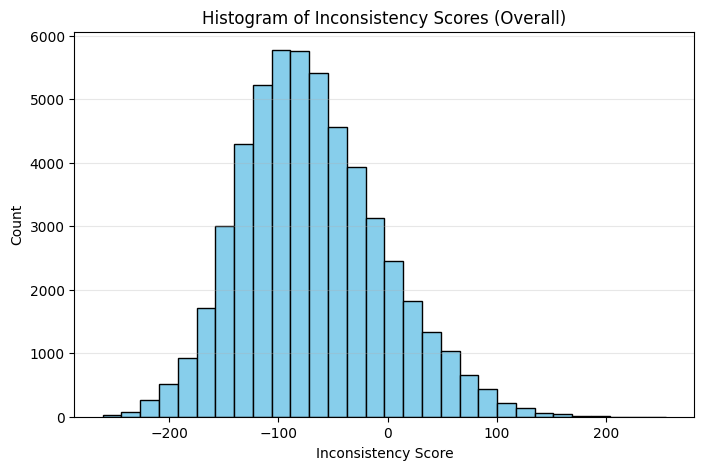

In [26]:
plt.figure(figsize=(8,5))
plt.hist(data_imputed['In_machine_dens'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Inconsistency Score")
plt.ylabel("Count")
plt.title("Histogram of Inconsistency Scores (Overall)")
plt.grid(axis='y', alpha=0.3)
plt.show()

Based on the plot, it seems that 40 is a good and safe cutoff. or should we just pick 100 top values in Io?

In [27]:
outlier_dens_machine_ID = data_imputed[data_imputed['In_machine_dens'] > 100]["ID"].tolist()

Now, we see the intersection between the two sets of indices caught to check the validity of our technique.

In [28]:
print(f"Unique outliers detected by DENS-MAN (reference method): {len(set(outlier_dens_man_ID))}")
print(f"Unique outliers detected by DENS-MACHINE: {len(set(outlier_dens_machine_ID))}")
print(f"Unique outliers detected by CORRELATION-based method: {len(set(outlier_corr_man_ID))}")

print("\nAgreement analysis with DENS-MAN as reference:\n")

print(
    f"Probability density method with hanpicked correlations vs Purely probability density method →\n"
    f"outliers for Probability density method with hanpicked correlations: {len(outlier_dens_man_ID)},\n"
    f"outliers for Purely probability density method with hanpicked correlations: {len(outlier_dens_machine_ID)},\n"
    f"and their common detections were: {len(set(outlier_dens_man_ID).intersection(outlier_dens_machine_ID))}\n"
)

print(
    f"Probability density method with hanpicked correlations vs scalar correlation method →\n"
    f"outliers for Probability density method with hanpicked correlations: {len(outlier_dens_man_ID)},\n"
    f"outliers for the scalar correlation method : {len(outlier_corr_man_ID)},\n"
    f"and their common detections were: {len(set(outlier_dens_man_ID).intersection(outlier_corr_man_ID))}"
)



Unique outliers detected by DENS-MAN (reference method): 274
Unique outliers detected by DENS-MACHINE: 475
Unique outliers detected by CORRELATION-based method: 232

Agreement analysis with DENS-MAN as reference:

Probability density method with hanpicked correlations vs Purely probability density method →
outliers for Probability density method with hanpicked correlations: 274,
outliers for Purely probability density method with hanpicked correlations: 475,
and their common detections were: 55

Probability density method with hanpicked correlations vs scalar correlation method →
outliers for Probability density method with hanpicked correlations: 274,
outliers for the scalar correlation method : 232,
and their common detections were: 24


Despite applying a relatively stringent threshold, the DENS-MACHINE method shows limited agreement with the reference DENS-MAN detections, capturing only a small fraction of the structurally inconsistent cases. This suggests that the automated density-based approach is compensatory in nature, where inconsistencies in specific dimensions may be masked by agreement in unrelated or weakly correlated columns, reducing its effectiveness for targeted inconsistency detection.

The hand-picked correlation-based method demonstrates a higher degree of alignment with DENS-MAN, indicating improved sensitivity to structured inconsistencies. However, its reliance on manually identified correlation structures and increased mathematical complexity limits its scalability and general applicability.

In contrast, the DENS-MAN method offers a conceptually robust and interpretable framework that directly encodes inconsistency through domain-relevant structure, making it better suited as a reference approach for downstream statistical analysis.

Only 11 coincidences  out of a strongly filetered indices list, which show that evaluating the total inconsistency is not the right way to reject careless entries. This is because -
1) It could be purey accidental.
2) One coincidence could hidden by other coincidences.

Now, we will note down all the indices that had atleast one strong contradcition or more two contradictions in their responses, which is I > 6.

In [29]:
inconsistent_HSNS = data_imputed[data_imputed["In_man_dens"] > 10]["ID"].tolist()
len(inconsistent_HSNS)
# ***********

274

Just for reference: 
* cutoff for I_dens_machine_HSNS was 100   and 475 entries passed it
* cutoff for I_dens_man_HSNS     was 10    and 274  entries passed it 
* cutoff for I_corr_man_HSNS     was 1.9  and 232 entries passed it

In [30]:
print(sorted(set(outlier_dens_man_ID).intersection(set(outlier_dens_machine_ID))))
data_imputed.head()

[3930, 4302, 5448, 6372, 6981, 8251, 8870, 9730, 9817, 11263, 11517, 11549, 12061, 12934, 13278, 14229, 16324, 17081, 17100, 17182, 17753, 19415, 19813, 20012, 21875, 23674, 24133, 25385, 25651, 25803, 26380, 27411, 28175, 29923, 30549, 32121, 32195, 32323, 32327, 32582, 32920, 33344, 33862, 34803, 34895, 39872, 40661, 43032, 43232, 43836, 44138, 45409, 46224, 50402, 52440]


,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,...,DDM3,DDM4,age,gender,accuracy,country,ID,In_man_corr,In_man_dens,In_machine_dens
0,2.0,4.0,5.0,1.0,4.0,5.0,4.0,3.0,3.0,2.0,...,2.0,1.0,37,2,98.0,PT,0,0.0,0.0,-20.515599
1,4.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,...,4.0,3.0,34,3,95.0,PL,1,0.0,0.0,-106.134825
2,5.0,5.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,...,4.0,2.0,22,2,80.0,AU,2,0.0,0.0,-145.585099
3,4.0,1.0,2.0,2.0,4.0,5.0,2.0,2.0,5.0,2.0,...,3.0,4.0,24,1,99.0,US,3,0.0,0.0,-61.788397
4,5.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,1.0,5.0,21,2,90.0,US,4,0.0,0.0,-60.378878


Now we will extend the same analysis to rest of the 12 rows.

There does not seem to be a reliable correlation among the 12 DD columns but we can explore for the cross relations between the DD and HSNS columns. For this purpose, we will resort to the probability density trick. 
* First we round off all entries to nearest integers.
* Then we can make the 22*21/2 = 11*21 = 231 matrices of 5X5 size. and look for forbidden regions (probability densities less than 0.004) that are on extreme opposite ends (1-5, 1-4, 2-5)

In [31]:
data_imputed.head()

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,...,DDM3,DDM4,age,gender,accuracy,country,ID,In_man_corr,In_man_dens,In_machine_dens
0,2.0,4.0,5.0,1.0,4.0,5.0,4.0,3.0,3.0,2.0,...,2.0,1.0,37,2,98.0,PT,0,0.0,0.0,-20.515599
1,4.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,...,4.0,3.0,34,3,95.0,PL,1,0.0,0.0,-106.134825
2,5.0,5.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,...,4.0,2.0,22,2,80.0,AU,2,0.0,0.0,-145.585099
3,4.0,1.0,2.0,2.0,4.0,5.0,2.0,2.0,5.0,2.0,...,3.0,4.0,24,1,99.0,US,3,0.0,0.0,-61.788397
4,5.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,1.0,5.0,21,2,90.0,US,4,0.0,0.0,-60.378878


The analysis is complete until now. remove all the * from this markdown to proceed. 
* (***********************) maybe add the scalar correlation based inconsistency score to find further outliers.
* When dropping a row, not down its characteristics (age, country, gender, accuracy) to see what is the cause of the problem


Trap A: The "HSNS6" Pivot (The General Trap)
Look at your list. HSNS6 ("I feel that I am temperamentally different from most people") is involved in almost every strong contradiction.

The Pattern: (Any Item) -> (5, 1) where HSNS6 is the 1.
The Logic: If a user claims "I am NOT different from most people" (Score 1), but then answers Maximum Narcissism (Score 5) on almost any other question, they are lying.
Why it's powerful: HSNS6 seems to be the "Gateway Question." Valid narcissists always feel different. If you don't feel different, you shouldn't have high scores elsewhere.

Next step of cleaning is to drop the rows that are marked in a clear pattern without regard for the contents of the corresponding criteria.

Now, we remove some classic known patterns of careless markers, which could have bypassed the inconsistency filter. Known common patterns p1 = {1,2,3,4,5,4,3,2,1,...}, p2={1,2,3,4,5,1,2,3,4,5,...}, p3={1,3,5,3,1,...}, p4={5,3,1,3,5,...}, p5={2,4,2,4,2,4,..}, p6={1,3,5,1,3,,..}, p7={5,3,1,5,3,1,...}, p8={a three sequence repeated three times}, p9 = {a two sequence repeated five times}, p10={concatenated series (a sequence generated by identifying repeated consecutive entries.)}.

In [32]:
data_imputed.head()

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,...,DDM3,DDM4,age,gender,accuracy,country,ID,In_man_corr,In_man_dens,In_machine_dens
0,2.0,4.0,5.0,1.0,4.0,5.0,4.0,3.0,3.0,2.0,...,2.0,1.0,37,2,98.0,PT,0,0.0,0.0,-20.515599
1,4.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,...,4.0,3.0,34,3,95.0,PL,1,0.0,0.0,-106.134825
2,5.0,5.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,...,4.0,2.0,22,2,80.0,AU,2,0.0,0.0,-145.585099
3,4.0,1.0,2.0,2.0,4.0,5.0,2.0,2.0,5.0,2.0,...,3.0,4.0,24,1,99.0,US,3,0.0,0.0,-61.788397
4,5.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,1.0,5.0,21,2,90.0,US,4,0.0,0.0,-60.378878


### Step 8: Finding careless entries through high variance.
checking for variance and then detecting and checking outliers.

In [33]:
# Create a list to store the results
results = []

for i in range(len(data_imputed)):
    # Get the data for the specific row and columns 0-22
    row_subset = data_imputed.iloc[i, 0:22]
    
    # Calculate the mean of this row subset
    row_mean = row_subset.mean()
    
    var_sum = 0
    for j in range(22):
        # Accumulate the squared difference
        var_sum += (data_imputed.iloc[i, j] - row_mean)**2
    
    # Store the result for this row
    results.append(var_sum/22)

# Assign back to the dataframe if needed
data_imputed['calculated_var'] = results

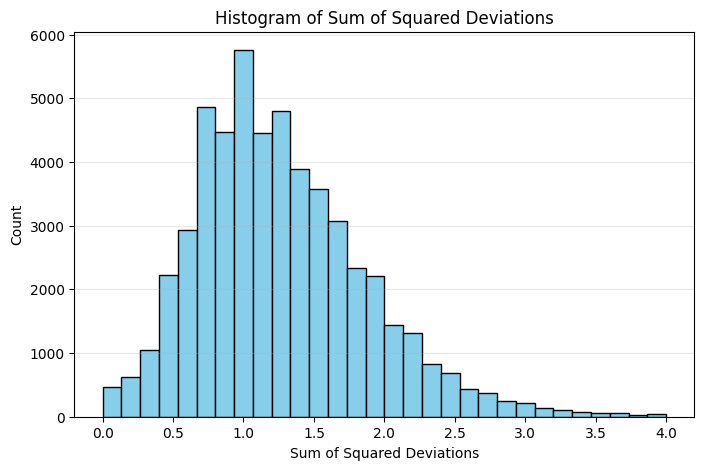

In [34]:
plt.figure(figsize=(8,5))
plt.hist(data_imputed['calculated_var'], bins=30, color='skyblue', edgecolor='black')
plt.xlabel("Sum of Squared Deviations")
plt.ylabel("Count")
plt.title("Histogram of Sum of Squared Deviations")
plt.grid(axis='y', alpha=0.3)
plt.show()

In [35]:
# 1. Identify the Extreme Responders
# Using 2.5 as the cut-off is a solid definition for ERS
high_var_mask = (data_imputed['calculated_var'] > 3.5)
high_var_ids = data_imputed.loc[high_var_mask, "ID"].tolist()

print(f"Number of Extreme Responders (Variance > 3.5): {len(high_var_ids)}")

# 2. Inspect a specific user safely
chosen_arbitrary_index = 12
target_id = high_var_ids[chosen_arbitrary_index]

# Use boolean masking to find the row where ID matches target_id
target_row = data_imputed[data_imputed["ID"] == target_id]

print(f"\n--- Inspection for ID: {target_id} ---")
print(f"Variance: {target_row['calculated_var'].values[0]:.2f}")
print("Response Pattern:")
# Display just the survey columns as integers for readability
print(target_row[cols[1:23]].astype(int).to_string(index=False))

Number of Extreme Responders (Variance > 3.5): 165

--- Inspection for ID: 2518 ---
Variance: 3.63
Response Pattern:
 HSNS1  HSNS2  HSNS3  HSNS4  HSNS5  HSNS6  HSNS7  HSNS8  HSNS9  HSNS10  DDP1  DDP2  DDP3  DDP4  DDN1  DDN2  DDN3  DDN4  DDM1  DDM2  DDM3  DDM4
     1      2      5      5      1      5      5      5      1       1     1     1     1     3     5     5     5     1     1     5     1     1


These noted ids represent people who displayed "absolute behaviour" in the sense that their markings were extreme 1 or 5 too many times. This is a low quality data because it does not incolve proper intrsopection or rushed or non-serious beahviour towards the evaluation.

The cell below was used to check differnet patterns to detect lazy entries. Some patterns were found to be prominent and used for further detection and row deletions from final analysis.

In [36]:
# # This the OG cell. The cell below has removed bad filters.


# pat_size = 8 # this is an important number, which will fine tuned later through statistical methods.
# # It represents the size of a continous sub-string that needs to be identical to one of the patterns,
# # for the whole row entry to be marked as carless.

# patt1_id = []
# patt2_id = []
# patt3_id = []
# patt4_id = []
# patt5_id = []
# patt6_id = []

# patt_rand1_id = []
# patt_rand2_id = []
# patt_rand3_id = []
# patt_rand4_id = []
# patt_rand5_id = []
# patt_rand6_id = []

# p1 = [1,2,3,4,5,4,3,2]
# p2 = [1,2,3,4,5]
# p3 = [1,3,5,3]
# # p4 = {a four, {not all same} sequence repeated three times}
# # p5 = {a three, all distinct sequence repeated three times}
# # p6 = {a two sequence repeated three times}

# def patt_rep(s1):
#     """
#     Checks for specific repetitive patterns in row s1.
#     Returns the name of the pattern found, or None if clean.
#     """
#     s1 = list(s1)
    
#     # Define the rules: (Name, Sequence Length, Repeat Count, Constraint)
#     # Constraint 1: 'not_all_same' (e.g., [1,1,1,2] is ok, [1,1,1,1] is skipped)
#     # Constraint 2: 'distinct' (all numbers in sequence must be different, e.g. [1,2])
#     patterns = [
#         {"name": "p4", "len": 4, "reps": 3, "type": "not_all_same"},
#         {"name": "p5", "len": 3, "reps": 4, "type": "not_all_same"},
#         {"name": "p6", "len": 2, "reps": 5, "type": "distinct"}
#     ]

#     for p in patterns:
#         seq_len = p["len"]
#         reps = p["reps"]
#         total_span = seq_len * reps
        
#         # Slide a window across s1
#         for i in range(len(s1) - total_span + 1):
#             # 1. Grab the full window (e.g., 12 items for p4)
#             window = s1[i : i + total_span]
            
#             # 2. Split window into chunks (e.g., three chunks of 4)
#             # This creates a list like [[1,2,3,4], [1,2,3,4], [1,2,3,4]]
#             chunks = [window[k : k+seq_len] for k in range(0, total_span, seq_len)]
            
#             # 3. Check if all chunks are identical
#             # We compare every chunk to the first chunk
#             if all(chunk == chunks[0] for chunk in chunks):
#                 base_seq = chunks[0]
                
#                 # 4. Check Constraints
#                 is_careless = False
                
#                 if p["type"] == "distinct":
#                     # Check if all items in base_seq are unique (e.g. [1,2] vs [1,1])
#                     if len(set(base_seq)) == len(base_seq):
#                         is_careless = True
                        
#                 elif p["type"] == "not_all_same":
#                     # Check if there is at least some variation (e.g. not [1,1,1,1])
#                     if len(set(base_seq)) > 1:
#                         is_careless = True

#                 if is_careless:
#                     print(f"Matched {p['name']}: Sequence {base_seq} repeated {reps} times.")
#                     return True # Or return p['name'] if you want to know which one

#     return False

# def long_string(s):
#     # Ensure input is a list to handle pandas Series or numpy arrays
#     s = list(s)
    
#     # Edge case: Empty list
#     if len(s) == 0:
#         return 0

#     max_run = 1
#     current_run = 1

#     # Iterate starting from the second item
#     for i in range(1, len(s)):
#         if s[i] == s[i-1]:
#             current_run += 1
#         else:
#             # If the run breaks, check if it was the longest so far
#             if current_run > max_run:
#                 max_run = current_run
#             # Reset current run
#             current_run = 1

#     # Final check: In case the longest run was at the very end of the list
#     if current_run > max_run:
#         max_run = current_run

#     return int(max_run)

# def resemble(s1, s2, size=pat_size):
#   # s1 is the whole row of size 22
#   # s2 is the size of the pattern sample
#   # see if s1 and s2 resemble for {size} number of consecutive entries.
#   # we know that s2 is smaller than s1

#   s1 = list(s1)
#   s2 = list(s2) 
  
#   # Calculate how many times we need to repeat s2 to ensure we can always slice 'size'
#   # (+2 is a safety buffer)
#   repeats = (size // len(s2)) + 2
#   s2_extended = s2 * repeats

#   for i in range (len(s1)-size+1):
#     for j in range (len(s2)):
#       # This replaces your complex if/else and modulo logic
#       ss2 = s2_extended[j : j+size]
      
#       if s1[i:i+size] == ss2:
#         print("matched sub-sequence:", s1[i:i+size])
#         return True


# def switch_increment(x,y,dir,swi):
#   if x==y:
#     return swi
  
#   if abs(y-x) <= 2:
#     if dir == 1 and y > x:
#       return swi+1
#     if dir == -1 and y < x:
#       return swi+1
#     if dir == 1 and y < x:
#       return 1
#     if dir == -1 and y > x:
#       return 1
    
#   if abs(y - x) >= 3:
#     return 0

# def monotonic_check(start, row_data, switch_critical = 9):
  
#   #first we define a direction
#   for i in range (start, len(row_data)-switch_critical):
#     diff = row_data[i+1] - row_data[i]
#     if abs(diff) <= 2 and diff != 0:
#       dir = abs(diff)//diff
#       ind = i+1
#       switch = 1
#       break
#     else:
#       if i >= len(row_data)-switch_critical-1:
#         return False
#       dir = 0
  
#   for i in range (ind,len(row_data)-1):
#     if row_data[i] == 5 or row_data[i] == 1:
#       dir = dir * -1

#     switch = switch_increment(row_data[i],row_data[i+1],dir,switch)
    
#     if row_data[i] == 5:
#       dir = -1
#     if row_data[i] == 1:
#       dir = 1
#     if switch == 0:
#       if i >= len(row_data)-switch_critical-1:
#         return False
#       else:
#         return monotonic_check(i, row_data, switch_critical)
#     if switch >= switch_critical:
#       return True

# data_imputed_integral = data_imputed[cols_all].copy()

# import random

# for i in range (len(data_imputed_integral)):
#   row_ID = data_imputed_integral.iloc[i]["ID"]
#   row_data = data_imputed_integral.iloc[i,0:22].round(0).astype(int)
#   # shuffled_row = random.sample(row_data.tolist(), len(row_data))
#   shuffled_row = [random.randint(1, 5) for _ in range(22)]

#   # this is the actual check
#   if long_string (row_data) >= 15:
#     patt6_id.append(row_ID)
#     print("long-string found in row of length atleast 15:", row_data.tolist())
#   elif resemble (row_data,p1):
#     patt1_id.append(row_ID)
#     print("pattern 1 matched for row:", row_data.tolist())
#   elif resemble (row_data,p2):
#     patt2_id.append(row_ID)
#     print("pattern 2 matched for row:", row_data.tolist())
#   elif resemble (row_data,p3):
#     patt3_id.append(row_ID)
#     print("pattern 3 matched for row:", row_data.tolist())
#   elif patt_rep (row_data):
#     patt5_id.append(row_ID)
#     print("repitition pattern found in row:", row_data.tolist())
#   elif monotonic_check (0, row_data):
#     patt4_id.append(row_ID)
#     print("monotonic pattern matched for row:", row_data.tolist())
#   # ***************

#   # this is the shuffled check
#   if long_string (shuffled_row) >= 15:
#     patt_rand6_id.append(row_ID)
#     print("long-string found in row of length atleast 15:", row_data.tolist())  
#   elif resemble (shuffled_row,p1):
#     patt_rand1_id.append(row_ID)
#     print("pattern 1 matched for row:", row_data.tolist())
#   elif resemble (shuffled_row,p2):
#     patt_rand2_id.append(row_ID)
#     print("pattern 2 matched for row:", row_data.tolist())
#   elif resemble (shuffled_row,p3):
#     patt_rand3_id.append(row_ID)
#     print("pattern 3 matched for row:", row_data.tolist())
#   elif patt_rep (shuffled_row):
#     patt_rand5_id.append(row_ID)
#     print("repitition pattern found in row:", row_data.tolist())
#   elif monotonic_check (0, shuffled_row):
#     patt_rand4_id.append(row_ID)
#     print("monotonic pattern matched for row:", row_data.tolist())
#   # *************

# print("total number of careless rows for p1:", len(patt1_id))
# print("total number of careless rows for p2:", len(patt2_id))
# print("total number of careless rows for p3:", len(patt3_id))
# print("total number of careless rows for p4:", len(patt4_id))
# print("For actual rows, ", len(patt1_id), len(patt2_id), len(patt3_id),len(patt5_id),len(patt6_id), len(patt4_id))
# print("For shuffled rows, ", len(patt_rand1_id), len(patt_rand2_id), len(patt_rand3_id),len(patt_rand5_id),len(patt_rand6_id), len(patt_rand4_id))
# print("total number of careless rows after pattern check:", len(patt1_id) + len(patt2_id) + len(patt3_id) + len(patt4_id))

### Step 9: Detecting the repeated pattern markings.

A/B test was used to check the method validity to detect careless people. p1 p2 p3 p4 were removed.
A/B test was also used to find the ideal stringsize for comparsion with patters. 
But this same random/actual A/B testing apporach cannot be used for longstring detection because of the nature of test and psychological reasons and accomodation for outliers. scoring 5 in 10 questions does not  necessarily mean a careless marker, could mean that the person actually feels that way. but marking it 1,2,3,1,2,3,1,2,3 is a visual pattern do decresae cognitoive load and does not directly impy anything on psychometric scale. Since for a patter long enough, the radom entries were negligible, the pattern is not random but careful done and hence such entries cannot be taken seriously and must be noted before doing full analysis.

In [37]:
# This the updated cell. It has removed bad filters.


pat_size = 8 # this is an important number, which will fine tuned later through statistical methods.
# It represents the size of a continous sub-string that needs to be identical to one of the patterns,
# for the whole row entry to be marked as carless.

patt5_id = []
patt_rand5_id = []


# p4 = {a four, {not all same} sequence repeated three times}
# p5 = {a three, all distinct sequence repeated three times}
# p6 = {a two sequence repeated three times}

def patt_rep(s1):
    """
    Checks for repetitive patterns, allowing for PARTIAL repetitions.
    e.g. A pattern of length 4 repeated 2.5 times (Total length 10).
    """
    s1 = list(s1)
    
    # NEW CONFIGURATION
    # We use "span" instead of "reps". 
    # span=10 means we look for 10 consecutive items following the pattern.
    patterns = [
        # 4-item pattern repeated 2.5 times (10 items total)
        # e.g. 1,2,3,4, 1,2,3,4, 1,2
        {"name": "p4_partial", "len": 4, "span": 11, "type": "not_all_same"},
        
        # 3-item pattern repeated 3.33 times (10 items total)
        # e.g. 1,2,3, 1,2,3, 1,2,3, 1
        {"name": "p5_partial", "len": 3, "span": 11, "type": "not_all_same"},
        
        # 2-item pattern repeated 5 times (10 items total)
        # e.g. 1,5, 1,5, 1,5, 1,5, 1,5
        {"name": "p6", "len": 2, "span": 10, "type": "distinct"}
    ]

    for p in patterns:
        pat_len = p["len"]
        span = p["span"]
        
        # Slide a window across s1 of size 'span'
        for i in range(len(s1) - span + 1):
            window = s1[i : i + span]
            
            # 1. IDENTIFY THE BASE PATTERN
            # We assume the first 'pat_len' items are the pattern we are testing
            base_seq = window[0 : pat_len]
            
            # 2. CHECK CONSTRAINTS (Optimization: Check this before building the long string)
            valid_constraints = False
            if p["type"] == "distinct":
                # All items in base sequence must be unique
                if len(set(base_seq)) == pat_len:
                    valid_constraints = True
            elif p["type"] == "not_all_same":
                # Not all items are the same
                if len(set(base_seq)) > 1:
                    valid_constraints = True
            
            if not valid_constraints:
                continue

            # 3. CONSTRUCT THE IDEAL SEQUENCE
            # We assume the base_seq repeats enough times to cover the span
            # e.g. if base=[1,2,3,4] and span=10. 
            # We multiply by 3 to get [1,2,3,4,1,2,3,4,1,2,3,4] (length 12)
            # Then we slice it back to [:10]
            repeats_needed = (span // pat_len) + 2
            expected_seq = (base_seq * repeats_needed)[:span]
            
            # 4. COMPARE
            if window == expected_seq:
                # print(f"Matched {p['name']}: Pattern {base_seq} spanning {span} items")
                return True

    return False


data_imputed_integral = data_imputed[cols].copy()

import random

for i in range (len(data_imputed_integral)):
  row_ID = data_imputed_integral.iloc[i]["ID"]
  row_data = data_imputed_integral.iloc[i,1:23].round(0).astype(int)
  shuffled_row = [random.randint(1, 5) for _ in range(22)]


  if patt_rep (row_data):
    patt5_id.append(row_ID)
    # print("repitition pattern found in row:", row_data.tolist())

  # this is for the randomly generated row check
  if patt_rep (shuffled_row):
    patt_rand5_id.append(row_ID)
    # print("repitition pattern found in row:", shuffled_row.tolist())

print("Pattern check gave matches, for ACTUAL",len(patt5_id),"and for random entries", len(patt_rand5_id))

Pattern check gave matches, for ACTUAL 284 and for random entries 7


this shows that the pattern was very likely intentional and not some random occurence, especially since the questions were not strongly correlated to result in definitive prefeered pattern

### Step 10: Detecting the longString markings.

for long string lookup we dont need randomized entries row because we know mathematically how unlikely is a for acertain pattern to appear in random row.

In [38]:
# 1. CALCULATE MAX RUNS (The raw data)
# We assume data_imputed_integral is your dataframe
n_rows = len(data_imputed_integral)
max_runs = np.zeros((n_rows, 5), dtype=int)

# Helper to get max run per value for a row
def get_row_max_runs(row_data):
    row = list(row_data)
    runs = [0] * 5 # Indices 0-4 correspond to values 1-5
    for val_idx in range(5):
        target = val_idx + 1
        max_r = 0
        curr_r = 0
        for x in row:
            if x == target:
                curr_r += 1
                if curr_r > max_r: max_r = curr_r
            else:
                curr_r = 0
        runs[val_idx] = max_r
    return runs

for i in range(n_rows):
    row_vals = data_imputed_integral.iloc[i, 1:23].round(0).astype(int)
    max_runs[i, :] = get_row_max_runs(row_vals)

now we will plot 5 histograms based on this long_string data and the observations will decide which cutoff to choose for those 5 numbers separately as a filter. remeber that it has to be 10 for it to unexplaianble by randomness.

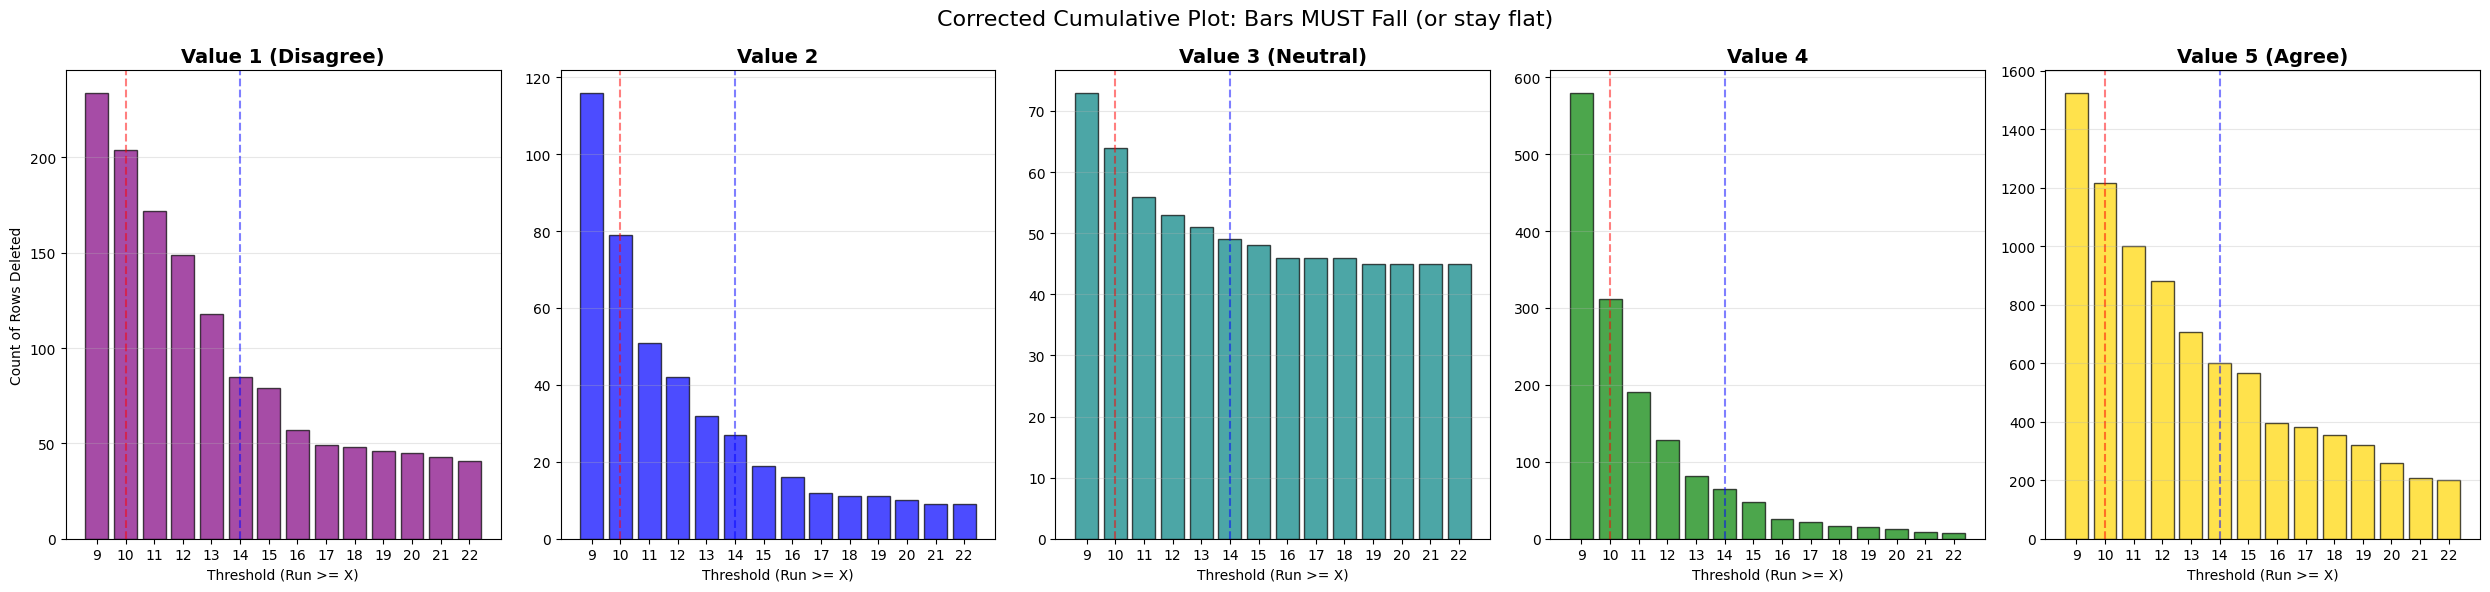

In [39]:
# 2. PLOT THE "FALLING BARS" (Cumulative Count)
fig, axes = plt.subplots(1, 5, figsize=(25, 6), sharey=False) 

colors = ['#800080', '#0000FF', '#008080', '#008000', '#FFD700'] 
titles = ["Value 1 (Disagree)", "Value 2", "Value 3 (Neutral)", "Value 4", "Value 5 (Agree)"]

# Thresholds from 9 to 22
thresholds = np.arange(9, 23)

for i in range(5):
    ax = axes[i]
    col_data = max_runs[:, i]
    
    # --- THE CRITICAL LOGIC ---
    # For every threshold 't', count how many people have a run >= t
    # This list is mathematically guaranteed to be descending.
    counts = [np.sum(col_data >= t) for t in thresholds]
    # --------------------------
    
    # Plot as bars
    ax.bar(thresholds, counts, color=colors[i], edgecolor='black', alpha=0.7)
    
    # Styling
    ax.set_title(titles[i], fontsize=14, fontweight='bold')
    ax.set_xlabel("Threshold (Run >= X)")
    ax.set_xticks(thresholds)
    ax.grid(axis='y', alpha=0.3)
    
    # Add markers for reference
    ax.axvline(10, color='red', linestyle='--', alpha=0.5) 
    ax.axvline(14, color='blue', linestyle='--', alpha=0.5)

axes[0].set_ylabel("Count of Rows Deleted")
plt.suptitle("Corrected Cumulative Plot: Bars MUST Fall (or stay flat)", fontsize=16)
plt.tight_layout()
plt.show()

The observation from the plots above is that
* For entry = 1, the plateau hits at t = 16, so we stick to it because you can genuinly hit all 1 if you're a saint or is it suspicipus if you have all 22 1s without contrdiction if youre mother teresa?
* For entry = 2, the plateau hits at t = 15, so we stick to 14 as base rule
* For entry = 3, the plateau hits at t = 12, so we take 12 as cutoff for this entry
* For entry = 4, the plateau never hits, however 14 is too much for repetaed entry (expect for 1)  and should always be flagged.
* For entry = 5, the plateau hits at t = 14, so we take 14.. this has highest number flags = 600

In [40]:
# --- 1. DEFINE THE MISSING HELPER FUNCTION ---
def get_long_string_stats(row):
    """
    Returns (max_length, value_of_max_length) for a given row.
    Example: [1, 1, 1, 2, 3] -> Returns (3, 1)
    """
    max_len = 0
    max_val = 0
    
    current_len = 0
    current_val = -1 # Start with a dummy value
    
    for x in row:
        if x == current_val:
            current_len += 1
        else:
            # Check if previous run was the longest so far
            if current_len > max_len:
                max_len = current_len
                max_val = current_val
            # Reset
            current_val = x
            current_len = 1
            
    # Final check (in case the longest run ends at the last item)
    if current_len > max_len:
        max_len = current_len
        max_val = current_val
        
    return max_len, max_val

# --- 2. DEFINE THE FILTER LOGIC ---
def final_long_string_filter(row):
    # Get max run length and the value associated with it
    length, val = get_long_string_stats(row)
    
    # Apply your Data-Driven Rules
    if val == 1:
        return length >= 16  # The "Saint" Plateau
    elif val == 2:
        return length >= 14  # Base Rule
    elif val == 3:
        return length >= 12  # Early Plateau (Neutrality)
    elif val == 4:
        return length >= 14  # Safe limit for Nuance
    elif val == 5:
        return length >= 14  # The Contradiction & Massive Plateau
        
    return False

# --- 3. APPLY AND COUNT ---
long_string_rows = []

# Assuming 'data_imputed_integral' follows standard structure (Col 0 = ID)
n_rows = len(data_imputed_integral)

for i in range(n_rows):
    # FIX: Use 1:23 to skip 'ID' and get all 22 items
    row_data = data_imputed_integral.iloc[i, 1:23].round(0).astype(int)
    
    # Get ID for reporting
    # You can access column name directly if index 0 is ID
    row_ID = data_imputed_integral.iloc[i]["ID"] # Or iloc[i, 0]
    
    if final_long_string_filter(row_data):
        long_string_rows.append(row_ID)

print(f"Final Count of LongString Outliers: {len(long_string_rows)}")
print(f"IDs Flagged: {long_string_rows}")

Final Count of LongString Outliers: 802
IDs Flagged: [190.0, 225.0, 370.0, 442.0, 517.0, 543.0, 569.0, 578.0, 732.0, 747.0, 845.0, 947.0, 954.0, 1125.0, 1139.0, 1160.0, 1223.0, 1233.0, 1239.0, 1257.0, 1299.0, 1330.0, 1423.0, 1456.0, 1667.0, 1679.0, 1793.0, 1797.0, 1829.0, 1833.0, 1839.0, 1841.0, 1884.0, 1937.0, 2092.0, 2112.0, 2215.0, 2341.0, 2393.0, 2412.0, 2425.0, 2435.0, 2477.0, 2619.0, 2779.0, 3383.0, 3626.0, 3765.0, 3851.0, 3899.0, 3973.0, 3984.0, 4067.0, 4069.0, 4101.0, 4247.0, 4456.0, 4482.0, 4563.0, 4693.0, 4694.0, 4759.0, 4813.0, 4855.0, 4935.0, 5005.0, 5108.0, 5120.0, 5144.0, 5193.0, 5196.0, 5300.0, 5535.0, 5620.0, 5641.0, 5650.0, 5776.0, 5896.0, 5899.0, 6106.0, 6135.0, 6186.0, 6367.0, 6391.0, 6406.0, 6527.0, 6656.0, 6722.0, 6741.0, 6816.0, 6836.0, 6853.0, 6893.0, 6966.0, 6968.0, 6975.0, 7033.0, 7065.0, 7100.0, 7143.0, 7210.0, 7234.0, 7297.0, 7319.0, 7345.0, 7390.0, 7398.0, 7438.0, 7555.0, 7603.0, 7764.0, 7793.0, 7865.0, 7885.0, 7914.0, 7928.0, 7959.0, 7962.0, 8009.0, 8126.0,

The other patterns p1 p2 p3 have a lower size threshold as opposed to the monotonic check, this is why even though p4 is superset of p1 and p3, some rows get regietered at p1 and p3 due to having lower threshold. This makes sense because having continous shift in same direction withou an brakes is itself a big red flag.

* This also shows that the test was continous questions among the test subjects because we are able to see continous patterns through the segregations.

a cell to do the math

In [41]:
prev = 1
for i in range (9,23):
  sum = 0
  for j in range (i+1,23):
    sum += 1/np.power(5,j)
  factor = sum/prev
  prev = sum
  print(factor)

1.2799999989514244e-07
0.1999999993446399
0.19999999672319993
0.19999998361599974
0.19999991807999162
0.19999959039979032
0.19999795199475712
0.19998975986892628
0.19994879672299032
0.19974391805377714
0.19871794871794873
0.1935483870967742
0.16666666666666669
0.0


1/5th is the factor of histogram fall as expected for lower end of values but we see a much lower fall maybe sue to sticky behaviour of human psychology.

### Step 11: Checking for the dominance of the 5 entries among different columns.
just a check for which of columns have higheest number 0f 5 markings

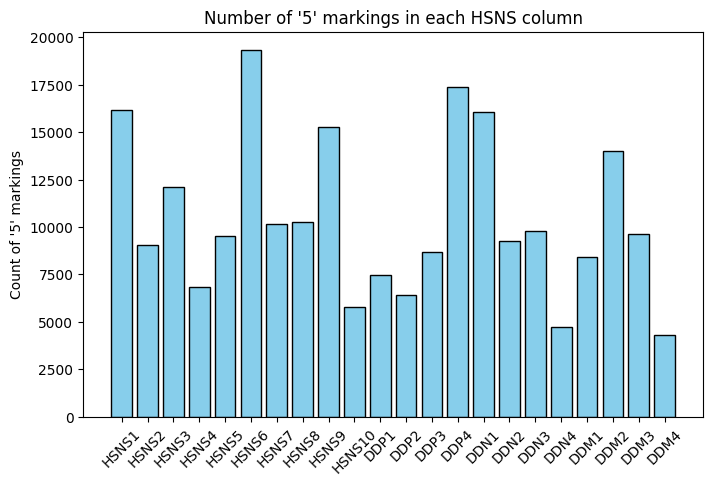

In [42]:
# Count number of 5s in each column
five_counts = [data_imputed[col].value_counts().get(5, 0) for col in cols[1:23]]

plt.figure(figsize=(8,5))
plt.bar(cols[1:23], five_counts, color='skyblue', edgecolor='black')
plt.ylabel("Count of '5' markings")
plt.title("Number of '5' markings in each HSNS column")
plt.xticks(rotation=45)
plt.show()

HSNS6 is heavily marked as 5.

Now, we analyse the intersection of the dropped indices to study how one careless behaviour implies the other. and also see how demographic column entrieies affect these behaviours.

types of indices we have noted so far are -
1) In_man_corr
2) In_man_dens
3) In_machine_dens
4) high_var_ids
5) patt5_id
6) long_string
7) man0rows
8) dropped_age_ids
9) imputed_high_acc_ids

### Step 12: Finding the characteristics and correlations among the entries noted as careless.

In [43]:
# Create a DataFrame to track all types of careless responding
flag_matrix = pd.DataFrame({'ID': data_imputed['ID']})

# 1. Inconsistency (Correlation - Manual)
flag_matrix['Flag_Inconsist_Corr'] = flag_matrix['ID'].isin(outlier_corr_man_ID)

# 2. Inconsistency (Density - Manual)
# Note: You used threshold > 10 earlier
flag_matrix['Flag_Inconsist_Dens'] = flag_matrix['ID'].isin(outlier_dens_man_ID)

# 3. Inconsistency (Density)
# Note: You used threshold > 10 earlier
flag_matrix['Flag_Inconsist_Dens'] = flag_matrix['ID'].isin(outlier_dens_machine_ID)

# 4. High Variance (Extreme Responding)
flag_matrix['Flag_High_Var'] = flag_matrix['ID'].isin(high_var_ids)

# 5. Pattern Repetition (patt5 - partial repetition)
flag_matrix['Flag_Pattern'] = flag_matrix['ID'].isin(patt5_id)

# 6. Long String (Invariant responding)
flag_matrix['Flag_LongString'] = flag_matrix['ID'].isin(long_string_rows)

# Calculate Total Flags per user
flag_cols = [col for col in flag_matrix.columns if col != 'ID']
flag_matrix['Total_Flags'] = flag_matrix[flag_cols].sum(axis=1)

print("Summary of Flags per User:")
print(flag_matrix['Total_Flags'].value_counts().sort_index())

# Merge flags back into main data for demographic analysis
data_analyzed = pd.merge(data, flag_matrix, on='ID', how='left')

Summary of Flags per User:
Total_Flags
0    50918
1     1753
2       87
3        9
4        1
Name: count, dtype: int64


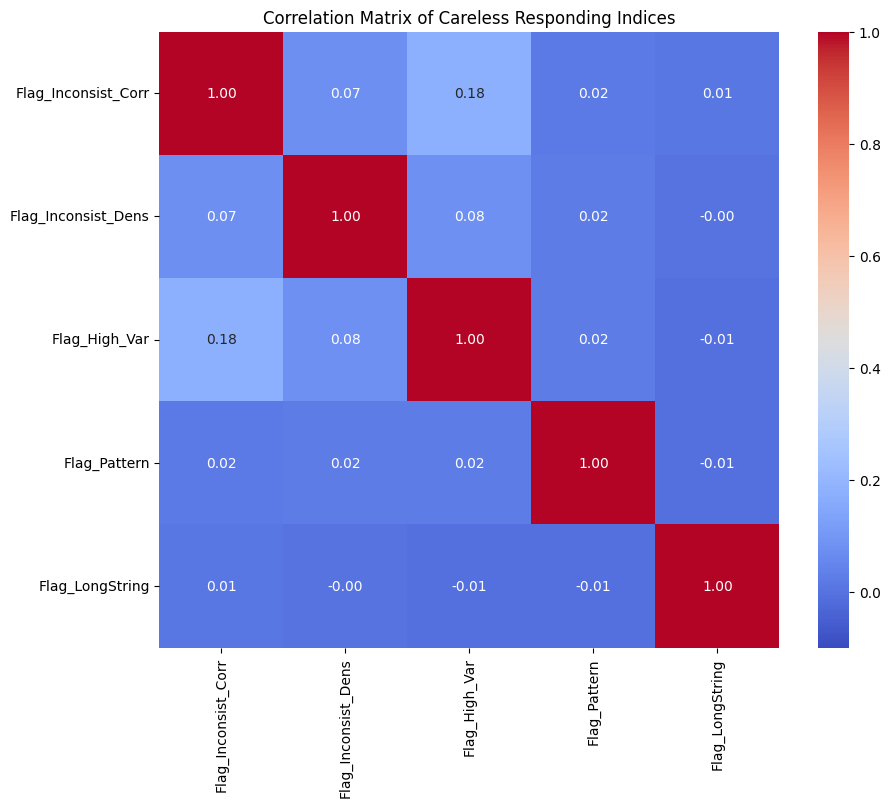

Overlap between Density Inconsistency and Long String: 1


In [44]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate correlation between the boolean flags (converting to int for correlation)
correlation_of_flags = flag_matrix[flag_cols].astype(int).corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_of_flags, annot=True, cmap='coolwarm', fmt=".2f", vmin=-0.1, vmax=1)
plt.title("Correlation Matrix of Careless Responding Indices")
plt.show()

# Set Analysis (Overlap between two major methods: Density vs LongString)
overlap = len(set(outlier_dens_man_ID).intersection(set(long_string_rows)))
print(f"Overlap between Density Inconsistency and Long String: {overlap}")

This low overlap shows how distinct the two patterns are. LongString markers would bypass the inconsistent pair responses, so both have to used to catch the careless participants.

Total identified careless respondents: 1850 (3.51%)


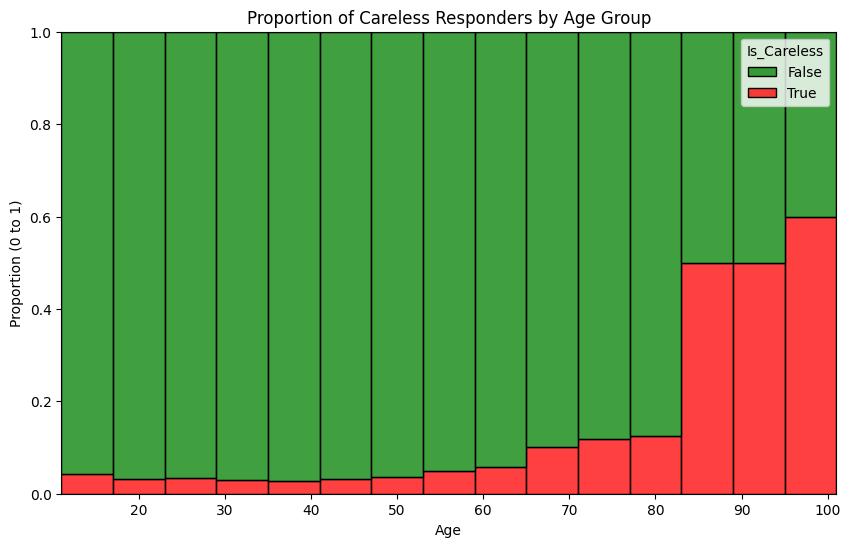

Mean Age - Clean: 25.83475391806434
Mean Age - Careless: 26.64864864864865

Percentage of Careless responses by Gender:
Is_Careless      False     True 
gender                          
0            95.620438  4.379562
1            96.002083  3.997917
2            97.434059  2.565941
3            91.810345  8.189655


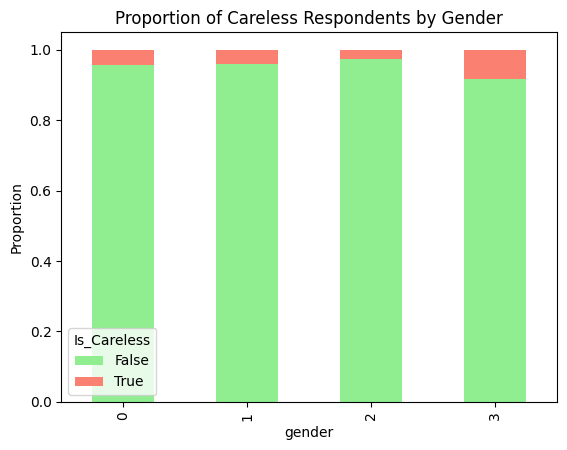

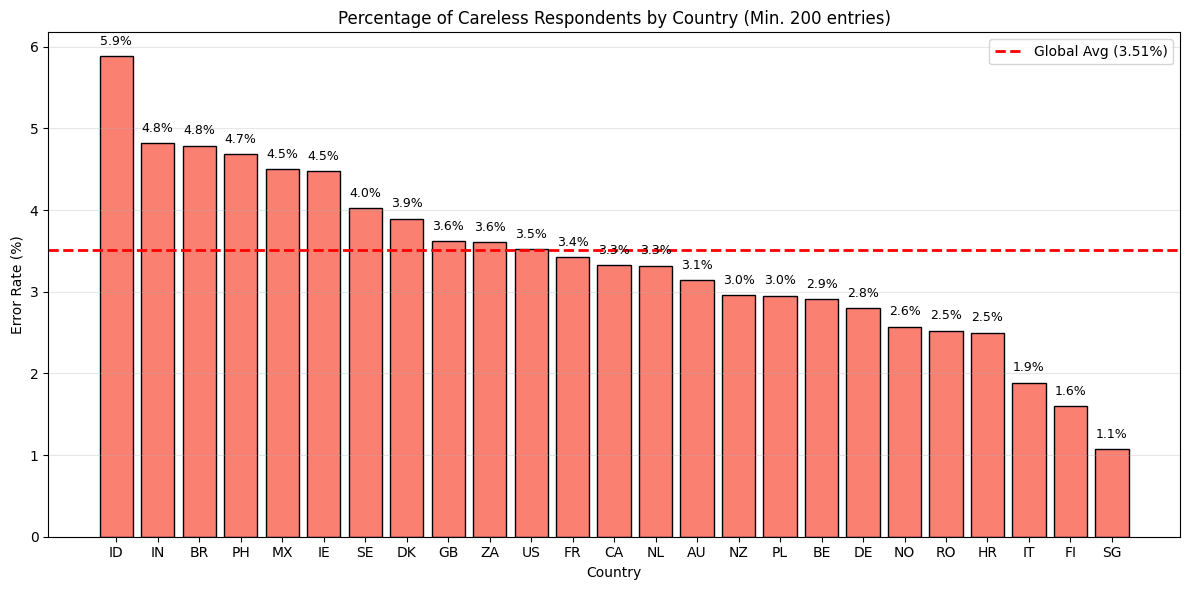

In [45]:
# Define "Careless" as anyone having at least 1 flag (or you can set threshold to 2)
data_analyzed['Is_Careless'] = data_analyzed['Total_Flags'] > 0

print(f"Total identified careless respondents: {data_analyzed['Is_Careless'].sum()} "
      f"({data_analyzed['Is_Careless'].mean()*100:.2f}%)")

# --- 1. AGE vs Carelessness (100% Stacked) ---
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))

# multiple='fill' stretches every bar to height 1.0 (100%)
# This allows you to see the RATIO inside every age group perfectly
sns.histplot(
    data=data_analyzed, 
    x='age', 
    hue='Is_Careless', 
    multiple='fill', 
    bins=15, 
    palette=['green', 'red'], 
    edgecolor='black'
)

plt.title("Proportion of Careless Responders by Age Group")
plt.xlabel("Age")
plt.ylabel("Proportion (0 to 1)")
plt.show()

print("Mean Age - Clean:", data_analyzed[~data_analyzed['Is_Careless']]['age'].mean())
print("Mean Age - Careless:", data_analyzed[data_analyzed['Is_Careless']]['age'].mean())

# --- 2. GENDER vs Carelessness ---
# 1=Male, 2=Female, 3=Other, 0=Missing
gender_counts = pd.crosstab(data_analyzed['gender'], data_analyzed['Is_Careless'], normalize='index')
print("\nPercentage of Careless responses by Gender:")
print(gender_counts * 100)

gender_counts.plot(kind='bar', stacked=True, color=['lightgreen', 'salmon'])
plt.title("Proportion of Careless Respondents by Gender")
plt.ylabel("Proportion")
plt.show()

# --- 3. COUNTRY vs Carelessness (Simple Error Rate) ---
# 1. Define Threshold (e.g., countries with > 1% of data or ~200 rows)
min_responses = 200 

# 2. Filter for valid countries
counts = data_analyzed['country'].value_counts()
valid_countries = counts[counts > min_responses].index
df_geo = data_analyzed[data_analyzed['country'].isin(valid_countries)]

# 3. Calculate Error Rate (Mean of Boolean = Fraction)
# We calculate the percentage of carelessness for each country
error_rates = df_geo.groupby('country')['Is_Careless'].mean() * 100
error_rates = error_rates.sort_values(ascending=False)

# 4. Plot Simple Bar Chart
plt.figure(figsize=(12, 6))
bars = plt.bar(error_rates.index, error_rates.values, color='salmon', edgecolor='black')

# Add the Global Average Line for context
global_avg = data_analyzed['Is_Careless'].mean() * 100
plt.axhline(global_avg, color='red', linestyle='--', linewidth=2, label=f'Global Avg ({global_avg:.2f}%)')

plt.title(f"Percentage of Careless Respondents by Country (Min. {min_responses} entries)")
plt.ylabel("Error Rate (%)")
plt.xlabel("Country")
plt.legend()
plt.grid(axis='y', alpha=0.3)

# Add values on top of bars for readability
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2., height + 0.1,
             f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

plt.tight_layout()
plt.show()

* The first plot says a lot. with age people tend to be more careless with surverys.
* a small Gender bias a there. other genders are as cofused about their personality as much about their sexuality. the confusion is inconsitent which can direct to the point that people worried about their gender are more likelty to be irrational or careless.
also women seem to be least careless.

# Geographical Analysis: The "Gig Economy" Effect

### 1. The Myth of Uniform Quality
Initial analysis of the top 10 contributing countries suggested that careless responding was uniformly distributed. However, by expanding our scope to all countries with statistical significance (>200 responses), a clear **geographical hierarchy** emerges.

### 2. Key Observations
*   **High Error Rates (The "Volume" Markets):** Countries such as **Indonesia (5.9%), India (4.8%), and Brazil (4.8%)** exhibit careless rates significantly above the global average (3.5%).
    *   *Hypothesis:* This likely reflects the "Clickworker" phenomenon, where respondents in lower-income economies may treat surveys as a primary income source, prioritizing speed (volume) over accuracy to maximize earnings.
*   **Low Error Rates (The "Precision" Markets):** Countries such as **Singapore (1.1%), Finland (1.6%), and Italy (1.9%)** show exceptionally high data quality.
    *   *Hypothesis:* This aligns with cultural dimensions of conscientiousness and rule-following, as well as a lack of economic pressure to "speed-run" the survey.

### 3. Business Implication
We cannot assume a "one-size-fits-all" quality filter. When analyzing global psychometric data, **strict quality controls are disproportionately necessary for data originating from specific emerging markets**, whereas data from regions like Scandinavia or Singapore requires less aggressive filtering.

### Step 13: Dropping all those careless rows from further analysis.

In [46]:
# Define the IDs to drop
# We combine all lists using set union
ids_to_drop = set(outlier_dens_man_ID) | \
              set(high_var_ids) | \
              set(patt5_id) | \
              set(long_string_rows)

print(f"Initial row count: {len(data_imputed)}")
print(f"Rows flagged for removal: {len(ids_to_drop)}")

# Create Final Clean Dataset
data_clean = data_imputed[~data_imputed['ID'].isin(ids_to_drop)].copy()

print(f"Final clean row count: {len(data_clean)}")
print(f"Percentage of data retained: {len(data_clean)/len(data_imputed)*100:.2f}%")

# Optional: Comparison of Cronbach's Alpha (Reliability)
# We can check if internal consistency of the scales (Narcissism, Psychopathy, Machiavellianism)
# improved after cleaning. This is the ultimate proof of success.

def cronbach_alpha(df, items):
    df_items = df[items]
    item_scores = df_items.sum(axis=1)
    n_items = len(items)
    var_items = df_items.var().sum()
    var_total = item_scores.var()
    return (n_items / (n_items - 1)) * (1 - var_items / var_total)

# Define sub-scales
scale_mach = ["DDM1", "DDM2", "DDM3", "DDM4"]
scale_psych = ["DDP1", "DDP2", "DDP3", "DDP4"]
scale_narc = ["DDN1", "DDN2", "DDN3", "DDN4"]
scale_hsns = cols[1:11] # HSNS1-10

print("\n--- Reliability Change (Cronbach's Alpha) ---")
for name, items in [("Machiavellianism", scale_mach), ("Psychopathy", scale_psych), ("Narcissism", scale_narc), ("HSNS", scale_hsns)]:
    alpha_before = cronbach_alpha(data_imputed, items)
    alpha_after = cronbach_alpha(data_clean, items)
    print(f"{name}: {alpha_before:.3f} -> {alpha_after:.3f}")

Initial row count: 52768
Rows flagged for removal: 1494
Final clean row count: 51274
Percentage of data retained: 97.17%

--- Reliability Change (Cronbach's Alpha) ---
Machiavellianism: 0.820 -> 0.813
Psychopathy: 0.781 -> 0.775
Narcissism: 0.775 -> 0.765
HSNS: 0.744 -> 0.733


In [47]:
data_clean.head()

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,...,DDM4,age,gender,accuracy,country,ID,In_man_corr,In_man_dens,In_machine_dens,calculated_var
0,2.0,4.0,5.0,1.0,4.0,5.0,4.0,3.0,3.0,2.0,...,1.0,37,2,98.0,PT,0,0.0,0.0,-20.515599,1.975207
1,4.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,...,3.0,34,3,95.0,PL,1,0.0,0.0,-106.134825,0.776860
2,5.0,5.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,...,2.0,22,2,80.0,AU,2,0.0,0.0,-145.585099,1.340909
3,4.0,1.0,2.0,2.0,4.0,5.0,2.0,2.0,5.0,2.0,...,4.0,24,1,99.0,US,3,0.0,0.0,-61.788397,1.693485
4,5.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,5.0,21,2,90.0,US,4,0.0,0.0,-60.378878,1.208678


Now we will do things with data_clean. Data cleaning is officially over.

In [48]:
data_clean = data_clean[cols+['age','gender','country']]  # Keep only ID and survey items


In [49]:
data_clean[cols[1:23]] = data_clean[cols[1:23]].round(0).astype(int)
data_clean.head()
data_clean.to_csv("Cleaned_Data_no_analysis.csv", index=False)

### Step 14: Analyzing the remaining good data

make a histogram for scores any one at a time

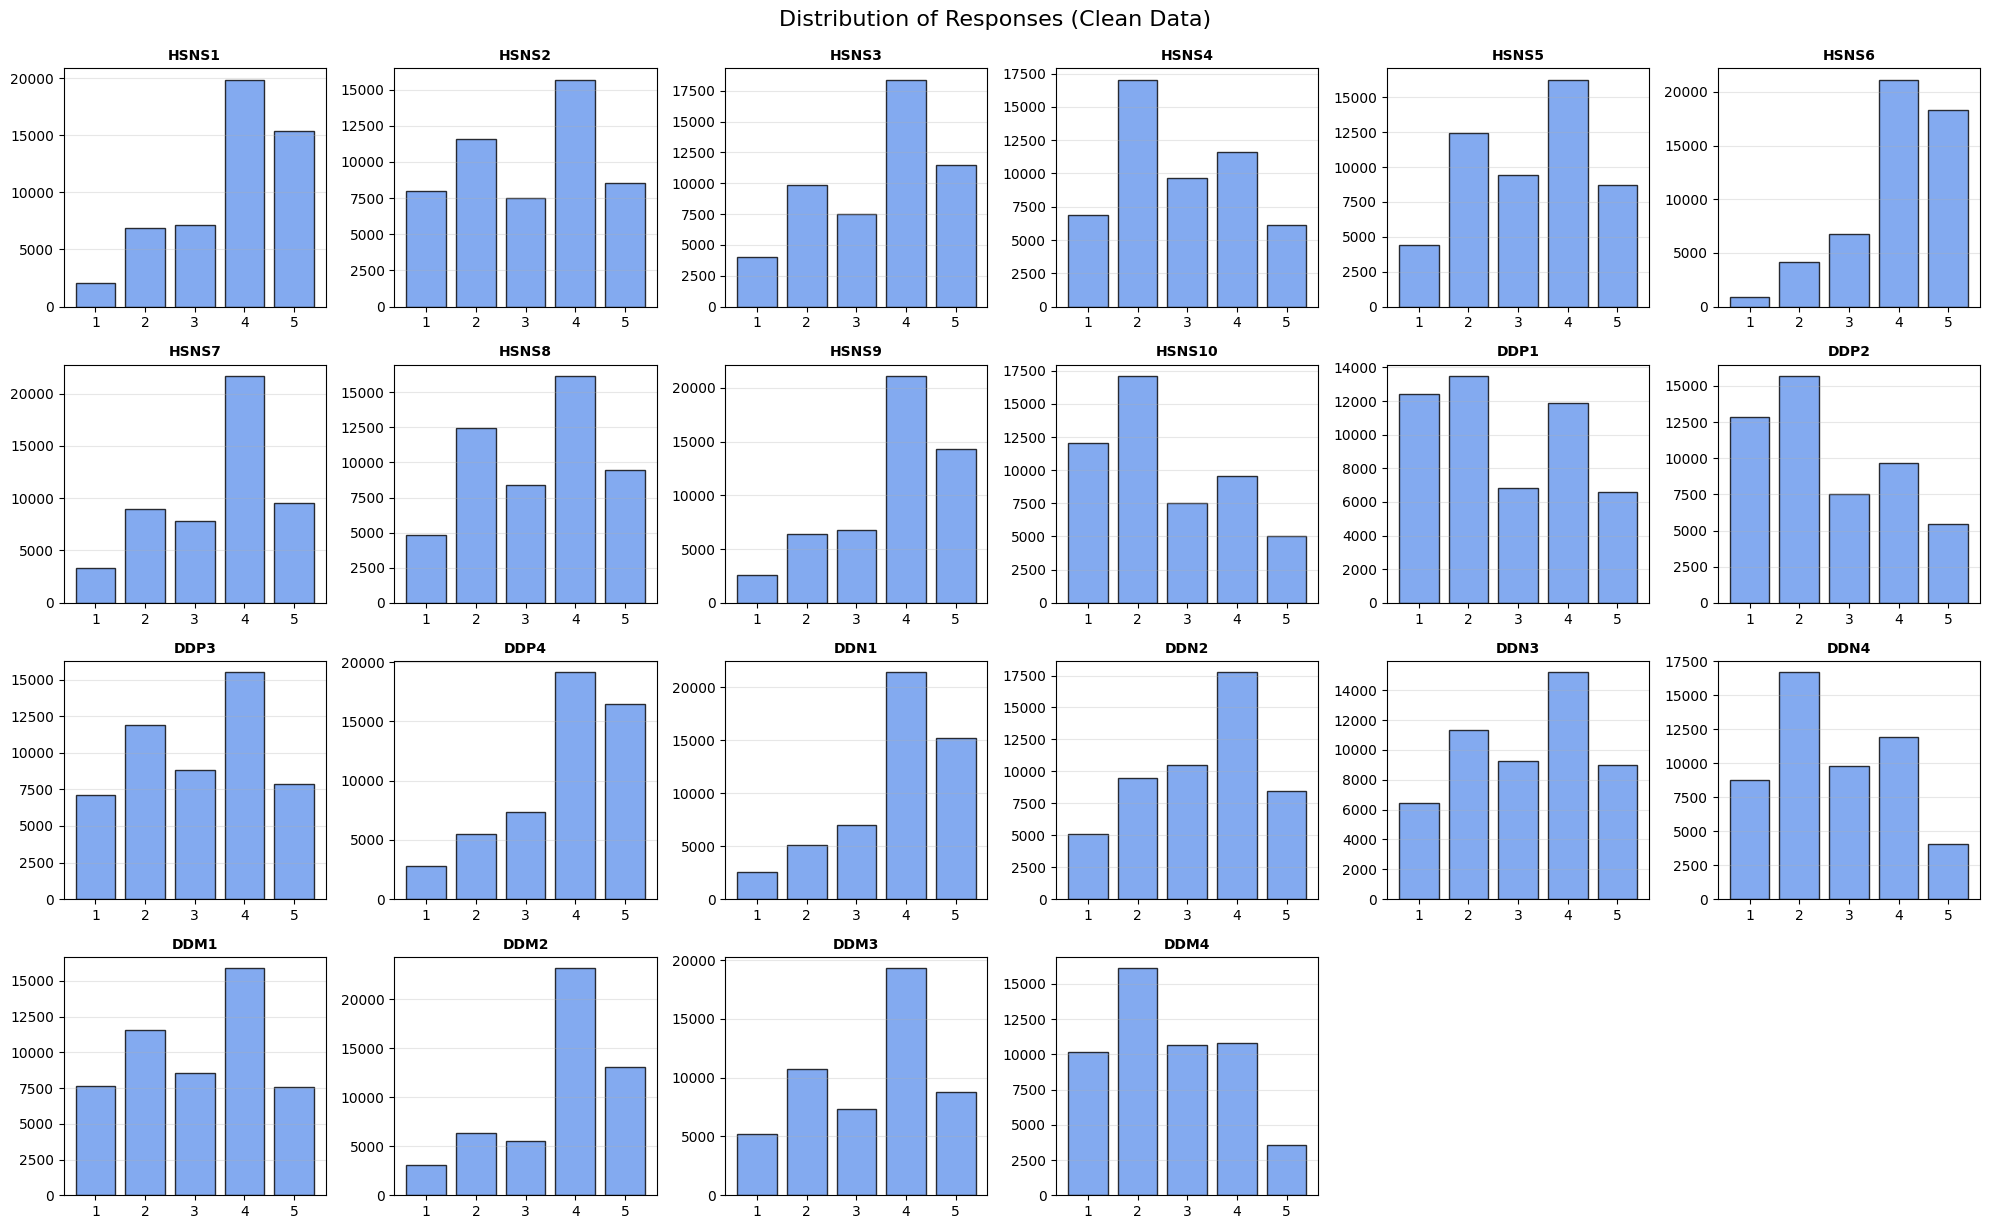


--- Distribution for HSNS6 (Temperamental Difference) ---
HSNS6
1     1.65
2     8.12
3    13.18
4    41.24
5    35.80
Name: proportion, dtype: float64


In [50]:
import math

# 1. Define the columns to plot (All 22 items)
items_to_plot = cols[1:23] 
num_plots = len(items_to_plot)

# 2. Calculate grid size dynamically
# We need 22 slots. 4 rows * 6 cols = 24 slots (fits perfectly)
n_cols_grid = 6
n_rows_grid = math.ceil(num_plots / n_cols_grid)

fig, axes = plt.subplots(n_rows_grid, n_cols_grid, figsize=(20, 12))
axes = axes.flatten() # Flatten 2D grid to 1D list

# 3. Loop and Plot
for i, col_name in enumerate(items_to_plot):
    # Get data
    data_to_plot = data_clean[col_name]
    
    # Correction: If data is 0-4, shift to 1-5 for display
    if data_to_plot.min() == 0:
        data_to_plot = data_to_plot + 1
        
    # Count frequencies
    counts = data_to_plot.value_counts().sort_index()
    
    # Plot
    axes[i].bar(counts.index, counts.values, color='cornflowerblue', edgecolor='black', alpha=0.8)
    axes[i].set_title(col_name, fontweight='bold', fontsize=10)
    axes[i].set_xticks([1, 2, 3, 4, 5])
    axes[i].grid(axis='y', alpha=0.3)

# 4. Hide empty subplots (if any)
for j in range(i + 1, len(axes)):
    axes[j].axis('off')

plt.tight_layout()
plt.suptitle("Distribution of Responses (Clean Data)", fontsize=16, y=1.02)
plt.show()

# 5. HSNS6 Statistics (Using data_clean, not X)
print("\n--- Distribution for HSNS6 (Temperamental Difference) ---")
print((data_clean['HSNS6'].value_counts(normalize=True).sort_index() * 100).round(2))

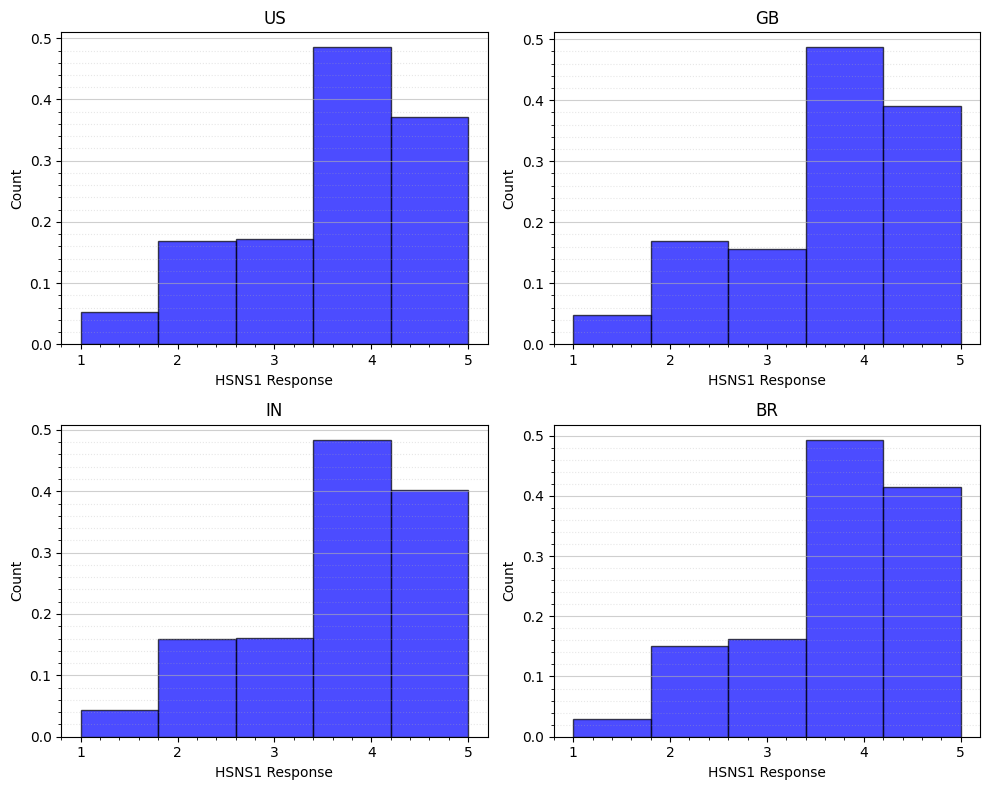

In [51]:
countries = ["US","GB","IN","BR"]
fig, axes = plt.subplots(2,2, figsize=(10,8))
axes = axes.flatten()

for ax, c in zip(axes, countries):
  ax.hist(data_clean.loc[(data_clean["country"] == c) & (data_clean["HSNS1"] != 0), "HSNS1"], bins=5, density=True, alpha=0.7, color='blue', edgecolor='black')
  ax.set_title(c)
  # ax.grid(axis="y", linestyle="--", alpha=0.5)
  ax.minorticks_on()
  ax.grid(axis="y", which="major", linestyle="-", alpha=0.6)
  ax.grid(axis="y", which="minor", linestyle=":", alpha=0.3)
  ax.set_xlabel("HSNS1 Response")
  ax.set_ylabel("Count")
  ax.set_xticks([1, 2, 3, 4, 5])

plt.tight_layout()
plt.show()

As clearly seen, the entries who scored 5 were found to be in more proportion in IN and BR than in US and GB. This indicates a further investigation into the matter using proper mathematical techniques. Following are some of the possible reasons for this observation :-
1) People in IN and BR like to score things on absolute terms and do not consider their wights propelry.
2) IN and BR actually contain larger number of people who strongly satify these criterions.
3) Difference of amounts of self awareness among the participants from different nations.
4) Difference in test case handling and instructions.

In [52]:
mean_us = data_clean.loc[(data_clean["country"].isin(["US"])) , "HSNS1"].mean()
mean_gb = data_clean.loc[(data_clean["country"].isin(["GB"])) , "HSNS1"].mean()
mean_in = data_clean.loc[(data_clean["country"].isin(["IN"])) , "HSNS1"].mean()
mean_br = data_clean.loc[(data_clean["country"].isin(["BR"])) , "HSNS1"].mean()
print("mean for US, GB, IN, BR:", mean_us, mean_gb, mean_in, mean_br)
std_us = data_clean.loc[(data_clean["country"].isin(["US"])) , "HSNS1"].std()
std_gb = data_clean.loc[(data_clean["country"].isin(["GB"])) , "HSNS1"].std()
std_in = data_clean.loc[(data_clean["country"].isin(["IN"])) , "HSNS1"].std()
std_br = data_clean.loc[(data_clean["country"].isin(["BR"])) , "HSNS1"].std()
print("std for US, GB, IN, BR:", std_us, std_gb, std_in, std_br)
# msd_us = np.sqrt(np.mean((data.loc[(data["country"].isin(["US"])) & (data["HSNS1"] != 0), "HSNS1"] - 5)**2))
# msd_gb = np.sqrt(np.mean((data.loc[(data["country"].isin(["GB"])) & (data["HSNS1"] != 0), "HSNS1"] - 5)**2))
# msd_in = np.sqrt(np.mean((data.loc[(data["country"].isin(["IN"])) & (data["HSNS1"] != 0), "HSNS1"] - 5)**2))
# msd_br = np.sqrt(np.mean((data.loc[(data["country"].isin(["BR"])) & (data["HSNS1"] != 0), "HSNS1"] - 5)**2))
# print("msd for US, GB, IN, BR:", msd_us, msd_gb, msd_in, msd_br)

mean for US, GB, IN, BR: 3.7624307323648347 3.803109683961467 3.834967320261438 3.8914405010438413
std for US, GB, IN, BR: 1.1393298590329035 1.1313068114913354 1.1155292017299607 1.0691126673606695


below is a check to see whether missing country indces have any intersection with other characteristics of carelessness.

In [53]:
print(len(set(dropped_age_ids) & set(no_country_IDs)))
print(len(set(many_missing_rows) & set(no_country_IDs)))
print(len(set(outlier_dens_man_ID) & set(no_country_IDs)))
print(len(set(high_var_ids) & set(no_country_IDs)))
print(len(set(patt5_id) & set(no_country_IDs)))
print(len(set(long_string_rows) & set(no_country_IDs)))

0
0
0
0
0
0


There is no intersection of countries NaN values so they were hinest mistakes and no reflective of careless behaviour.we will ignore these Nan values in countries now due to this reason.

In [54]:
# Create Final Clean Dataset
data_clean = data_imputed[~data_imputed['ID'].isin(ids_to_drop)].copy()

# 1. Collect ALL dropped IDs from every cleaning step
all_bad_ids = set(dropped_age_ids) | \
              set(many_missing_rows) | \
              set(outlier_dens_man_ID) | \
              set(high_var_ids) | \
              set(patt5_id) | \
              set(long_string_rows)

print(f"Number of rows detected with inappropriate age entries: {len(dropped_age_ids)}")
print(f"Number of rows detected with missing data: {len(many_missing_rows)}")
print(f"Number of rows detected with high inconsistency score: {len(outlier_dens_man_ID)}")
print(f"Number of rows detected with high variance: {len(high_var_ids)}")
print(f"Number of rows detected with repeated distinct pattern: {len(patt5_id)}")
print(f"Number of rows detected with long strings: {len(long_string_rows)}")
print(f"Total rows that were removed: {len(all_bad_ids)}")

# 2. Create masks using data_untouched
# Note: We filter accuracy <= 100 to avoid the graph getting squashed by errors
mask_dropped = (data_untouched['ID'].isin(all_bad_ids)) & (data_untouched['accuracy'] <= 100)
mask_retained = (~data_untouched['ID'].isin(all_bad_ids)) & (data_untouched['accuracy'] <= 100)

# 3. Get the data
acc_dropped = data_untouched.loc[mask_dropped, 'accuracy']
acc_retained = data_untouched.loc[mask_retained, 'accuracy']

# 4. Statistics
print("\n--- Accuracy Statistics ---")
print(f"Dropped Rows (Mean):  {acc_dropped.mean():.2f} | (Median): {acc_dropped.median():.2f}")
print(f"Retained Rows (Mean): {acc_retained.mean():.2f} | (Median): {acc_retained.median():.2f}")

Number of rows detected with inappropriate age entries: 990
Number of rows detected with missing data: 223
Number of rows detected with high inconsistency score: 274
Number of rows detected with high variance: 165
Number of rows detected with repeated distinct pattern: 284
Number of rows detected with long strings: 802
Total rows that were removed: 2707

--- Accuracy Statistics ---
Dropped Rows (Mean):  85.58 | (Median): 90.00
Retained Rows (Mean): 83.38 | (Median): 88.00


people who were careless, self reported to have higher accuracy.

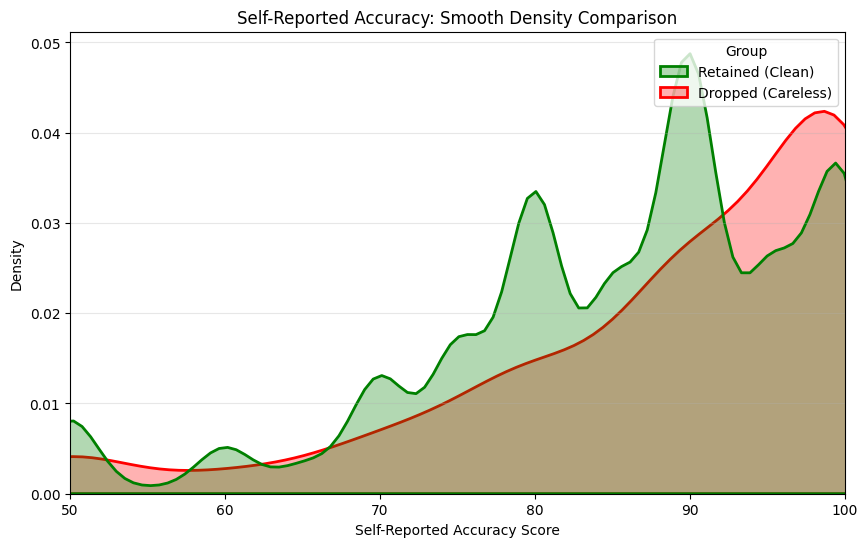

In [55]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# 1. Prepare the data in a format Seaborn loves (Long format)
# We combine them into one temporary table just for plotting
df_viz = pd.concat([
    pd.DataFrame({'Accuracy': acc_retained, 'Group': 'Retained (Clean)'}),
    pd.DataFrame({'Accuracy': acc_dropped, 'Group': 'Dropped (Careless)'})
])

# 2. Create the KDE Plot (Smooth Curves)
plt.figure(figsize=(10, 6))

sns.kdeplot(
    data=df_viz, 
    x='Accuracy', 
    hue='Group', 
    fill=True,              # Fills the area under the curve
    common_norm=False,      # Scales each group independently so you can see the shape of both
    palette=['green', 'red'],
    alpha=0.3,              # Transparency
    linewidth=2
)

plt.xlim(50, 100) # Zoom in on the relevant area (Most people claim >50% accuracy)
plt.title('Self-Reported Accuracy: Smooth Density Comparison')
plt.xlabel('Self-Reported Accuracy Score')
plt.ylabel('Density')
plt.grid(axis='y', alpha=0.3)
plt.show()

# Validation: Self-Reported Accuracy vs. Algorithmic Detection

To validate our cleaning pipeline, we compared the self-reported `accuracy` scores of the respondents we flagged for removal against those we retained.

### Statistics
*   **Total Rows Flagged for Removal:** 2,707
*   **Dropped Rows (Careless):** Mean Accuracy = **85.58** | Median = **90.00**
*   **Retained Rows (Clean):** Mean Accuracy = **83.38** | Median = **88.00**

### Observation
Contrary to the intuition that careless responders would report lower accuracy, the data shows the opposite: **The respondents flagged as "careless" by our algorithms reported *higher* accuracy levels than the clean respondents.**

### Interpretation
This phenomenon highlights a critical flaw in relying on self-reported data quality metrics:

1.  **Overconfidence / Lack of Introspection:** Respondents who answer carelessly (e.g., repetitively marking '5' or answering randomly) are likely to treat the accuracy question with the same lack of attention, selecting a high number by default to expedite the survey completion.
2.  **The "Good Subject" Effect:** Careless responders may artificially inflate their accuracy scores to avoid being filtered out or denied payment, whereas genuine respondents are more likely to provide a realistic, humble estimate of their attention level.

### Conclusion on Methodology
This comparison vindicates the use of **behavioral statistical filtering** (Long Strings, Probability Density, Pattern Matching) over simple metadata filtering. Had we relied solely on the provided `accuracy` column, we would have retained these high-confidence but low-quality data points, significantly corrupting the downstream psychological analysis.

In [56]:
# --- STEP 1: CALCULATE PSYCHOMETRIC SCORES ---

# 1. Machiavellianism (Strategy/Manipulation)
data_clean['Score_Mach'] = data_clean[['DDM1', 'DDM2', 'DDM3', 'DDM4']].mean(axis=1)

# 2. Narcissism (Grandiosity/Attention)
data_clean['Score_Narc'] = data_clean[['DDN1', 'DDN2', 'DDN3', 'DDN4']].mean(axis=1)

# 3. Psychopathy (Callousness/Impulsivity)
data_clean['Score_Psych'] = data_clean[['DDP1', 'DDP2', 'DDP3', 'DDP4']].mean(axis=1)

# 4. Vulnerable Narcissism (HSNS - Sensitivity/Isolation)
# Note: HSNS has 10 items
data_clean['Score_HSNS'] = data_clean[['HSNS1','HSNS2','HSNS3','HSNS4','HSNS5',
                                       'HSNS6','HSNS7','HSNS8','HSNS9','HSNS10']].mean(axis=1)

# 5. Create Age Groups (Crucial for Demographic Analysis in Power BI)
bins = [0, 18, 25, 35, 45, 55, 65, 120]
labels = ['<18', '18-25', '26-35', '36-45', '46-55', '56-65', '65+']
data_clean['Age_Group'] = pd.cut(data_clean['age'], bins=bins, labels=labels)

print("Scores calculated. Preview:")
print(data_clean[['Score_Mach', 'Score_Narc', 'Score_Psych', 'Score_HSNS']])

Scores calculated. Preview:
       Score_Mach  Score_Narc  Score_Psych  Score_HSNS
0            1.50        1.25       2.5000         3.3
1            3.75        2.50       3.5000         3.5
2            3.25        3.25       2.5000         4.1
3            3.25        3.75       3.3325         2.9
4            3.50        3.25       3.7500         4.3
...           ...         ...          ...         ...
52763        4.50        3.75       4.5000         3.3
52764        2.75        4.50       2.2500         4.1
52765        1.25        1.25       2.5000         2.5
52766        3.50        2.75       4.7500         4.1
52767        2.00        3.00       1.0000         3.0

[51274 rows x 4 columns]


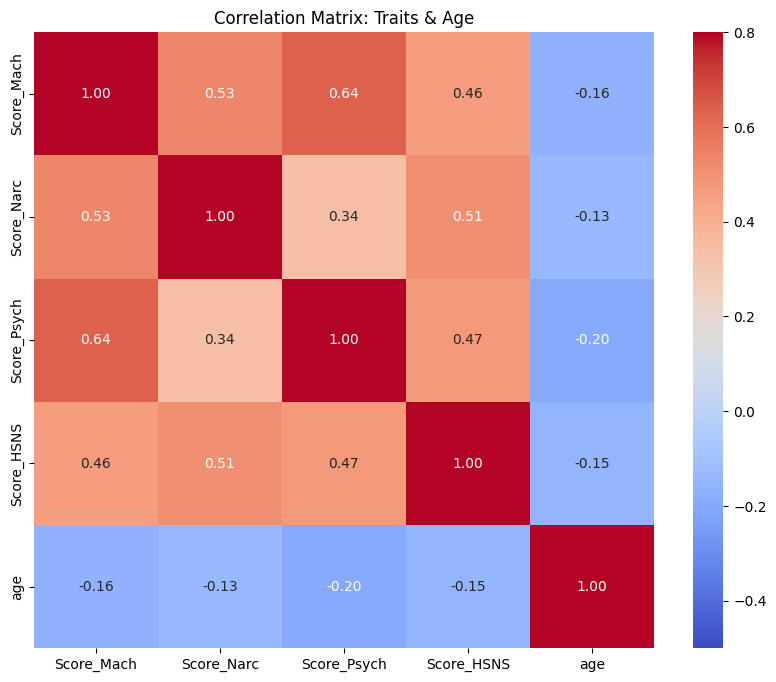

Correlation between Vulnerable Narcissism (HSNS) and Psychopathy: 0.474


In [57]:
# --- STEP 2: CORRELATION ANALYSIS ---
import seaborn as sns
import matplotlib.pyplot as plt

# Select the scores and Age for correlation
corr_features = ['Score_Mach', 'Score_Narc', 'Score_Psych', 'Score_HSNS', 'age']
corr_matrix = data_clean[corr_features].corr()

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", vmin=-0.5, vmax=0.8)
plt.title("Correlation Matrix: Traits & Age")
plt.show()

# Quick print for your report
print("Correlation between Vulnerable Narcissism (HSNS) and Psychopathy:", 
      round(corr_matrix.loc['Score_HSNS', 'Score_Psych'], 3))

In [58]:
# --- STEP 3: K-MEANS CLUSTERING ---
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# 1. Select features for clustering
features_for_clustering = ['Score_Mach', 'Score_Narc', 'Score_Psych', 'Score_HSNS']
X = data_clean[features_for_clustering]

# 2. Standardize the data (Make them all scale 0-1 so Math works)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# 3. Apply K-Means with 3 Clusters
kmeans = KMeans(n_clusters=3, random_state=42, n_init=10)
data_clean['Cluster_ID'] = kmeans.fit_predict(X_scaled)

print("Clustering Complete. Users have been assigned to Groups 0, 1, or 2.")

Clustering Complete. Users have been assigned to Groups 0, 1, or 2.


In [59]:
# --- STEP 4: INTERPRET & EXPORT ---

# Calculate the average score for each cluster to understand them
cluster_profile = data_clean.groupby('Cluster_ID')[features_for_clustering].mean()

print("--- CLUSTER PROFILES (Read this to name them in Power BI) ---")
print(cluster_profile)
print("-" * 50)

# Logic to Auto-Label the Clusters for Power BI
# We look for the cluster with the highest Dark Triad scores
max_dark_cluster = cluster_profile['Score_Psych'].idxmax()
min_dark_cluster = cluster_profile['Score_Psych'].idxmin()

def label_cluster(c_id):
    if c_id == max_dark_cluster:
        return "High Dark Triad"
    elif c_id == min_dark_cluster:
        return "Low Traits (Benevolent)"
    else:
        return "Moderate / Mixed"

data_clean['Personality_Type'] = data_clean['Cluster_ID'].apply(label_cluster)

print("Clusters labeled:", data_clean['Personality_Type'].unique())

# FINAL EXPORT
# This file goes into Power BI / Tableau
data_clean.to_csv("Final_Psychometric_Data_Cleaned.csv", index=False)
print("SUCCESS: 'Final_Psychometric_Data_Cleaned.csv' saved. Ready for Dashboarding.")

--- CLUSTER PROFILES (Read this to name them in Power BI) ---
            Score_Mach  Score_Narc  Score_Psych  Score_HSNS
Cluster_ID                                                 
0             4.159877    4.061483     3.978613    3.910965
1             2.116406    2.408531     2.054669    2.709927
2             3.156757    3.194481     3.024649    3.348930
--------------------------------------------------
Clusters labeled: ['Low Traits (Benevolent)' 'Moderate / Mixed' 'High Dark Triad']
SUCCESS: 'Final_Psychometric_Data_Cleaned.csv' saved. Ready for Dashboarding.


--- Average Personality Scores by Age Group ---
           Score_Mach  Score_Narc  Score_Psych  Score_HSNS
Age_Group                                                 
<18          3.307279    3.305879     3.213110    3.410271
18-25        3.257077    3.326904     3.144086    3.401483
26-35        3.161956    3.264225     3.028081    3.355233
36-45        2.994364    3.050829     2.781985    3.215973
46-55        2.750835    2.909352     2.529660    3.072522
56-65        2.584124    2.772481     2.370463    2.946299
65+          2.523988    2.906915     2.432524    2.946068


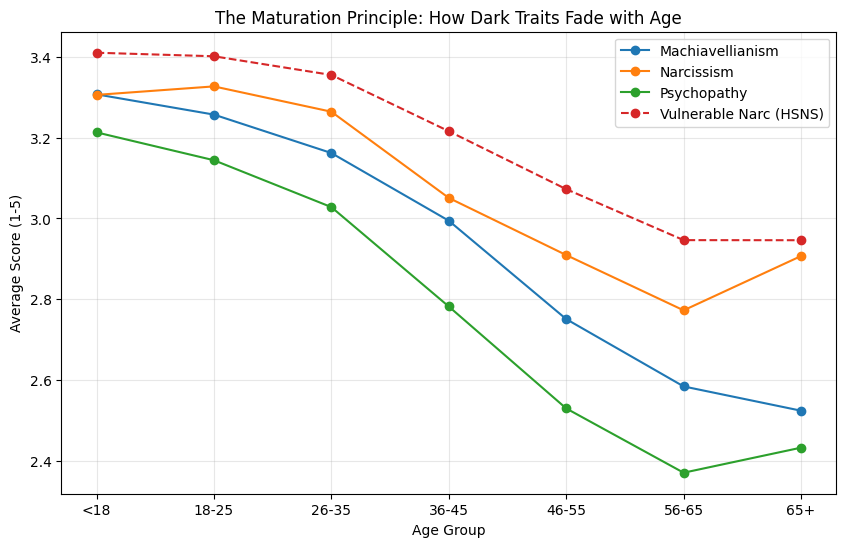

In [60]:
# 1. Group by Age and calculate the average score for each trait
age_trends = data_clean.groupby('Age_Group')[['Score_Mach', 'Score_Narc', 'Score_Psych', 'Score_HSNS']].mean()

# 2. Print the table (for your reference)
print("--- Average Personality Scores by Age Group ---")
print(age_trends)

# 3. Plot the Trend
plt.figure(figsize=(10, 6))
# We plot lines to show the "Trajectory" of personality over a lifetime
plt.plot(age_trends.index, age_trends['Score_Mach'], marker='o', label='Machiavellianism')
plt.plot(age_trends.index, age_trends['Score_Narc'], marker='o', label='Narcissism')
plt.plot(age_trends.index, age_trends['Score_Psych'], marker='o', label='Psychopathy')
plt.plot(age_trends.index, age_trends['Score_HSNS'], marker='o', label='Vulnerable Narc (HSNS)', linestyle='--')

plt.title("The Maturation Principle: How Dark Traits Fade with Age")
plt.xlabel("Age Group")
plt.ylabel("Average Score (1-5)")
plt.legend()
plt.grid(True, alpha=0.3)
plt.show()

In [61]:
data_clean.head()

,HSNS1,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,...,In_man_dens,In_machine_dens,calculated_var,Score_Mach,Score_Narc,Score_Psych,Score_HSNS,Age_Group,Cluster_ID,Personality_Type
0,2.0,4.0,5.0,1.0,4.0,5.0,4.0,3.0,3.0,2.0,...,0.0,-20.515599,1.975207,1.50,1.25,2.5000,3.3,36-45,1,Low Traits (Benevolent)
1,4.0,2.0,2.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,...,0.0,-106.134825,0.776860,3.75,2.50,3.5000,3.5,26-35,2,Moderate / Mixed
2,5.0,5.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,...,0.0,-145.585099,1.340909,3.25,3.25,2.5000,4.1,18-25,2,Moderate / Mixed
3,4.0,1.0,2.0,2.0,4.0,5.0,2.0,2.0,5.0,2.0,...,0.0,-61.788397,1.693485,3.25,3.75,3.3325,2.9,18-25,2,Moderate / Mixed
4,5.0,3.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,3.0,...,0.0,-60.378878,1.208678,3.50,3.25,3.7500,4.3,18-25,0,High Dark Triad


In [62]:
# --- STEP 5 (SCIENTIFIC): PREVALENCE-BASED THRESHOLDS ---

# 1. Define Cutoffs based on DSM-5 and Industrial Psychology estimates
# Psychopathy : ~7% (Corporate/Sub-clinical upper bound)
cutoff_psych = data_clean['Score_Psych'].quantile(0.93)

# Narcissism/Mach/HSNS: ~7% (Upper bound of NPD estimates)
cutoff_narc = data_clean['Score_Narc'].quantile(0.93)
cutoff_mach = data_clean['Score_Mach'].quantile(0.92)
cutoff_hsns = data_clean['Score_HSNS'].quantile(0.93)

print(f"--- Scientific Prevalence Thresholds ---")
print(f"Psychopathy (Top 7%):     Score > {cutoff_psych:.2f}")
print(f"Narcissism (Top 7%):      Score > {cutoff_narc:.2f}")
print(f"Machiavellianism (Top 8%):Score > {cutoff_mach:.2f}")
print(f"HSNS (Top 7%):            Score > {cutoff_hsns:.2f}")

# 2. Create Tags
data_clean['High_Mach']  = data_clean['Score_Mach'] > cutoff_mach
data_clean['High_Narc']  = data_clean['Score_Narc'] > cutoff_narc
data_clean['High_Psych'] = data_clean['Score_Psych'] > cutoff_psych
data_clean['High_HSNS']  = data_clean['Score_HSNS'] > cutoff_hsns

# 3. Verify the Rates
print("\nFinal Flag Rates (Target: ~7% Psych, ~7% Narc, ~8% Mach, ~7% HSNS):")
print(data_clean[['High_Psych', 'High_Narc', 'High_Mach', 'High_HSNS']].mean() * 100)

--- Scientific Prevalence Thresholds ---
Psychopathy (Top 7%):     Score > 4.50
Narcissism (Top 7%):      Score > 4.65
Machiavellianism (Top 8%):Score > 4.50
HSNS (Top 7%):            Score > 4.30

Final Flag Rates (Target: ~7% Psych, ~7% Narc, ~8% Mach, ~7% HSNS):
High_Psych    6.554979
High_Narc     7.001599
High_Mach     7.502828
High_HSNS     6.262433
dtype: float64


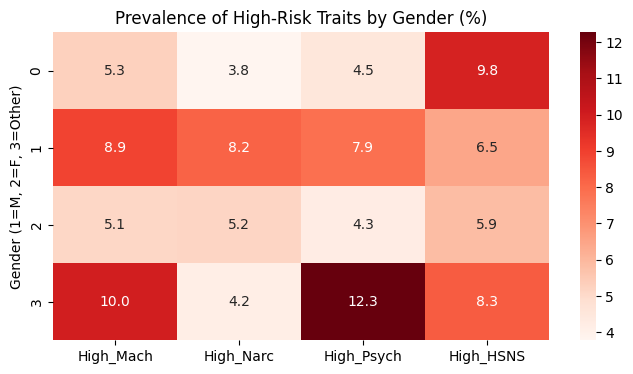

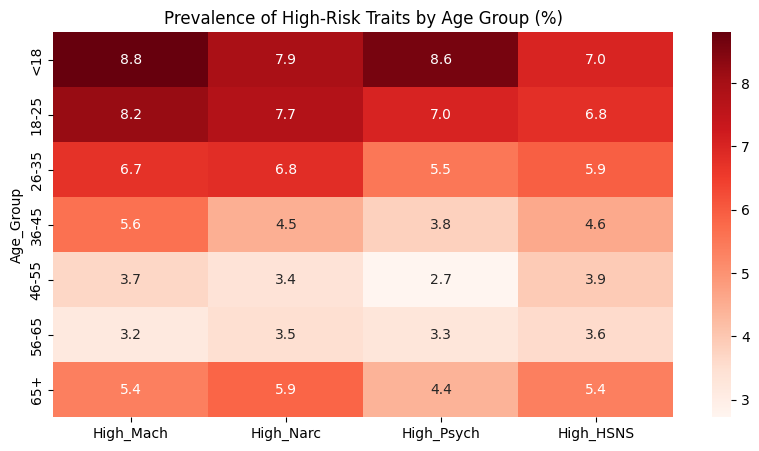

In [63]:
import seaborn as sns
import matplotlib.pyplot as plt

# --- A. GENDER ANALYSIS ---
# Group by Gender and calculate the % of High Scorers
gender_risk = data_clean.groupby('gender')[['High_Mach', 'High_Narc', 'High_Psych', 'High_HSNS']].mean() * 100

# Plot Heatmap
plt.figure(figsize=(8, 4))
sns.heatmap(gender_risk, annot=True, cmap='Reds', fmt=".1f")
plt.title("Prevalence of High-Risk Traits by Gender (%)")
plt.ylabel("Gender (1=M, 2=F, 3=Other)")
plt.show()

# --- B. AGE ANALYSIS ---
# Group by Age Group
age_risk = data_clean.groupby('Age_Group')[['High_Mach', 'High_Narc', 'High_Psych', 'High_HSNS']].mean() * 100

plt.figure(figsize=(10, 5))
sns.heatmap(age_risk, annot=True, cmap='Reds', fmt=".1f")
plt.title("Prevalence of High-Risk Traits by Age Group (%)")
plt.show()

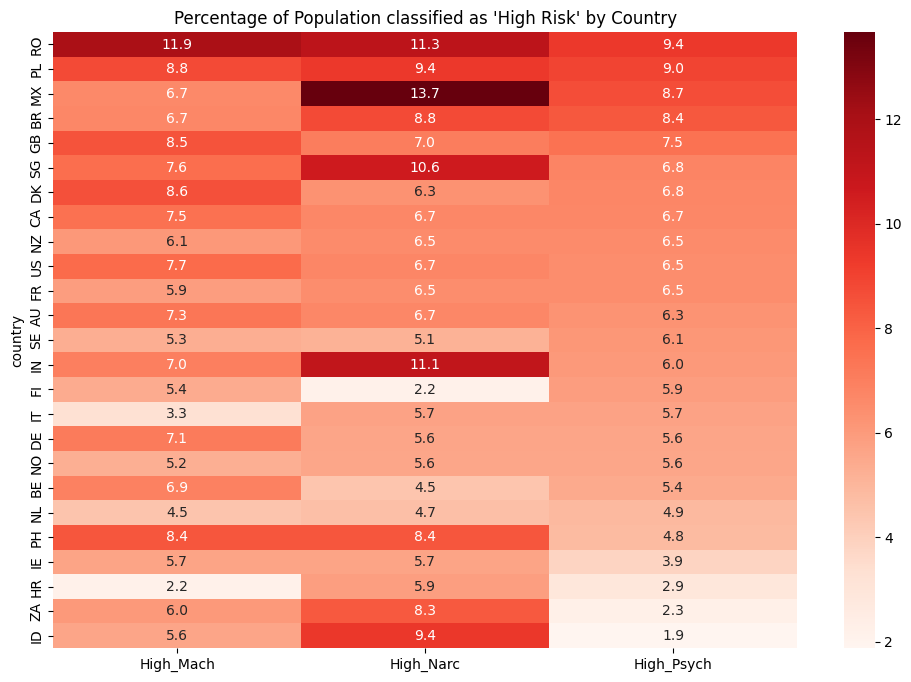

In [64]:
# --- C. COUNTRY ANALYSIS ---

# 1. Filter for statistically significant countries (>200 responses)
min_responses = 200 
counts = data_clean['country'].value_counts()
valid_countries = counts[counts > min_responses].index
df_geo_risk = data_clean[data_clean['country'].isin(valid_countries)]

# 2. Calculate % of High Psychopaths per Country
country_risk = df_geo_risk.groupby('country')[['High_Mach', 'High_Narc', 'High_Psych']].mean() * 100

# 3. Sort by Psychopathy (The most dangerous trait)
country_risk = country_risk.sort_values('High_Psych', ascending=False)

# 4. Plot
plt.figure(figsize=(12, 8))
sns.heatmap(country_risk, annot=True, cmap='Reds', fmt=".1f")
plt.title("Percentage of Population classified as 'High Risk' by Country")
plt.show()

In [65]:
data_clean.iloc[:,1:23].head()

,HSNS2,HSNS3,HSNS4,HSNS5,HSNS6,HSNS7,HSNS8,HSNS9,HSNS10,DDP1,...,DDP4,DDN1,DDN2,DDN3,DDN4,DDM1,DDM2,DDM3,DDM4,age
0,4.0,5.0,1.0,4.0,5.0,4.0,3.0,3.0,2.0,1.0,...,4.00,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,37
1,2.0,2.0,4.0,3.0,4.0,4.0,5.0,4.0,3.0,4.0,...,4.00,3.0,2.0,2.0,3.0,4.0,4.0,4.0,3.0,34
2,5.0,5.0,4.0,2.0,5.0,5.0,4.0,4.0,2.0,2.0,...,4.00,4.0,2.0,4.0,3.0,3.0,4.0,4.0,2.0,22
3,1.0,2.0,2.0,4.0,5.0,2.0,2.0,5.0,2.0,4.0,...,3.33,5.0,5.0,4.0,1.0,4.0,2.0,3.0,4.0,24
4,3.0,4.0,5.0,5.0,5.0,4.0,5.0,4.0,3.0,4.0,...,4.00,4.0,2.0,5.0,2.0,4.0,4.0,1.0,5.0,21


In [66]:
data_clean.iloc[:,1:23] = data_clean.iloc[:,1:23].round(0).astype(int)

Now, we convert the cleaned data to a csv file

In [67]:
data_clean.to_csv("Final_Psychometric_Data_with_markings.csv", index=False)

In [68]:
# ==========================================
# FINAL STEP: ETL TO SQL (For Portfolio)
# ==========================================
# Run this ONLY after you have finished:
# 1. Cleaning
# 2. Scoring (Feature Engineering)
# 3. Clustering (K-Means)
# ==========================================

import sqlite3
import pandas as pd

print("Starting SQL Export...")

# 1. Create a lightweight database file
conn = sqlite3.connect('Psychology_Data.db')

# 2. Load the final dataframe into SQL
# 'data_clean' is the dataframe from your previous analysis steps
data_clean.to_sql('final_survey_data', conn, if_exists='replace', index=False)
print("Data successfully loaded into 'Psychology_Data.db'")

# 3. VERIFICATION QUERY
# (This proves to recruiters you can Query, not just dump data)
query = """
SELECT 
    Personality_Type, 
    COUNT(*) as User_Count,
    AVG(Score_Psych) as Avg_Psychopathy,
    AVG(Score_Narc) as Avg_Narcissism
FROM final_survey_data 
GROUP BY Personality_Type
ORDER BY Avg_Psychopathy DESC
"""

print("\n--- SQL Validation Query Output ---")
sql_check = pd.read_sql(query, conn)
print(sql_check)

# 4. Close connection
conn.close()
print("\nSQL Pipeline Complete. You can now connect Power BI to 'Psychology_Data.db' or the CSV.")

Starting SQL Export...
Data successfully loaded into 'Psychology_Data.db'

--- SQL Validation Query Output ---
          Personality_Type  User_Count  Avg_Psychopathy  Avg_Narcissism
0          High Dark Triad       15647         3.978613        4.061483
1         Moderate / Mixed       22033         3.024649        3.194481
2  Low Traits (Benevolent)       13594         2.054669        2.408531

SQL Pipeline Complete. You can now connect Power BI to 'Psychology_Data.db' or the CSV.


In [69]:
conn = sqlite3.connect('Psychology_Data.db')
q1 = "SELECT ID, Score_Narc,High_Narc FROM final_survey_data WHERE Score_Narc > 4.25"
print(pd.read_sql(q1, conn))
q2 = "SELECT 100.0 * count(*) / (SELECT count(*) FROM final_survey_data) AS percent_hsns FROM final_survey_data WHERE High_HSNS = 1"
print(pd.read_sql(q2, conn))

         ID  Score_Narc  High_Narc
0        11        5.00          1
1        12        5.00          1
2        18        4.50          0
3        33        4.50          0
4        47        5.00          1
...     ...         ...        ...
6085  53913        4.75          1
6086  53936        5.00          1
6087  53957        5.00          1
6088  53962        4.75          1
6089  53977        4.50          0

[6090 rows x 3 columns]
   percent_hsns
0      6.262433


a check to see if there are entries without any counntry name